# Divide data

- Label distribution skew:
    - Case 1: Mỗi client chứa $c$ trên $num\_classes$ labels
    - Case 2: Chia sample của mỗi label cho mỗi client theo phân phối Dirichlet
- Feature distribution skew:
    - Case 1: Noise-based (e.g. thêm nhiễu vào data theo phân phối chuẩn)
    - Case 2: Read world dataset (i.e. `FEMNIST`, mỗi người tham gia là một client)

# Generate data (label skew, but not Dirichlet type)

- Với mỗi client, assign một/một vài nhãn nhất định
- Với mỗi nhãn, chia đều số sample cho client sở hữu nó

## Split data

In [1]:
from data_generator import quantity_base_gen
quantity_base_gen()

Get data of mnist

Generate mnist: k=1, num_clients=100, num_labels=10
Write data to ../../data/mnist/client_train_1 and ../../data/mnist/client_test_1

Generate mnist: k=2, num_clients=100, num_labels=10
Write data to ../../data/mnist/client_train_2 and ../../data/mnist/client_test_2

Generate mnist: k=3, num_clients=100, num_labels=10
Write data to ../../data/mnist/client_train_3 and ../../data/mnist/client_test_3

Get data of cifar10

Files already downloaded and verified
Files already downloaded and verified
Generate cifar10: k=1, num_clients=100, num_labels=10
Write data to ../../data/cifar10/client_train_1 and ../../data/cifar10/client_test_1

Generate cifar10: k=2, num_clients=100, num_labels=10
Write data to ../../data/cifar10/client_train_2 and ../../data/cifar10/client_test_2

Generate cifar10: k=3, num_clients=100, num_labels=10
Write data to ../../data/cifar10/client_train_3 and ../../data/cifar10/client_test_3

Get data of cifar100

Files already downloaded and verified
Fi

## Check distribution of datasets

/root/fl-imaml/src/data/data_generator.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=8, ncols=10, figsize=(15, 15), sharey=True)


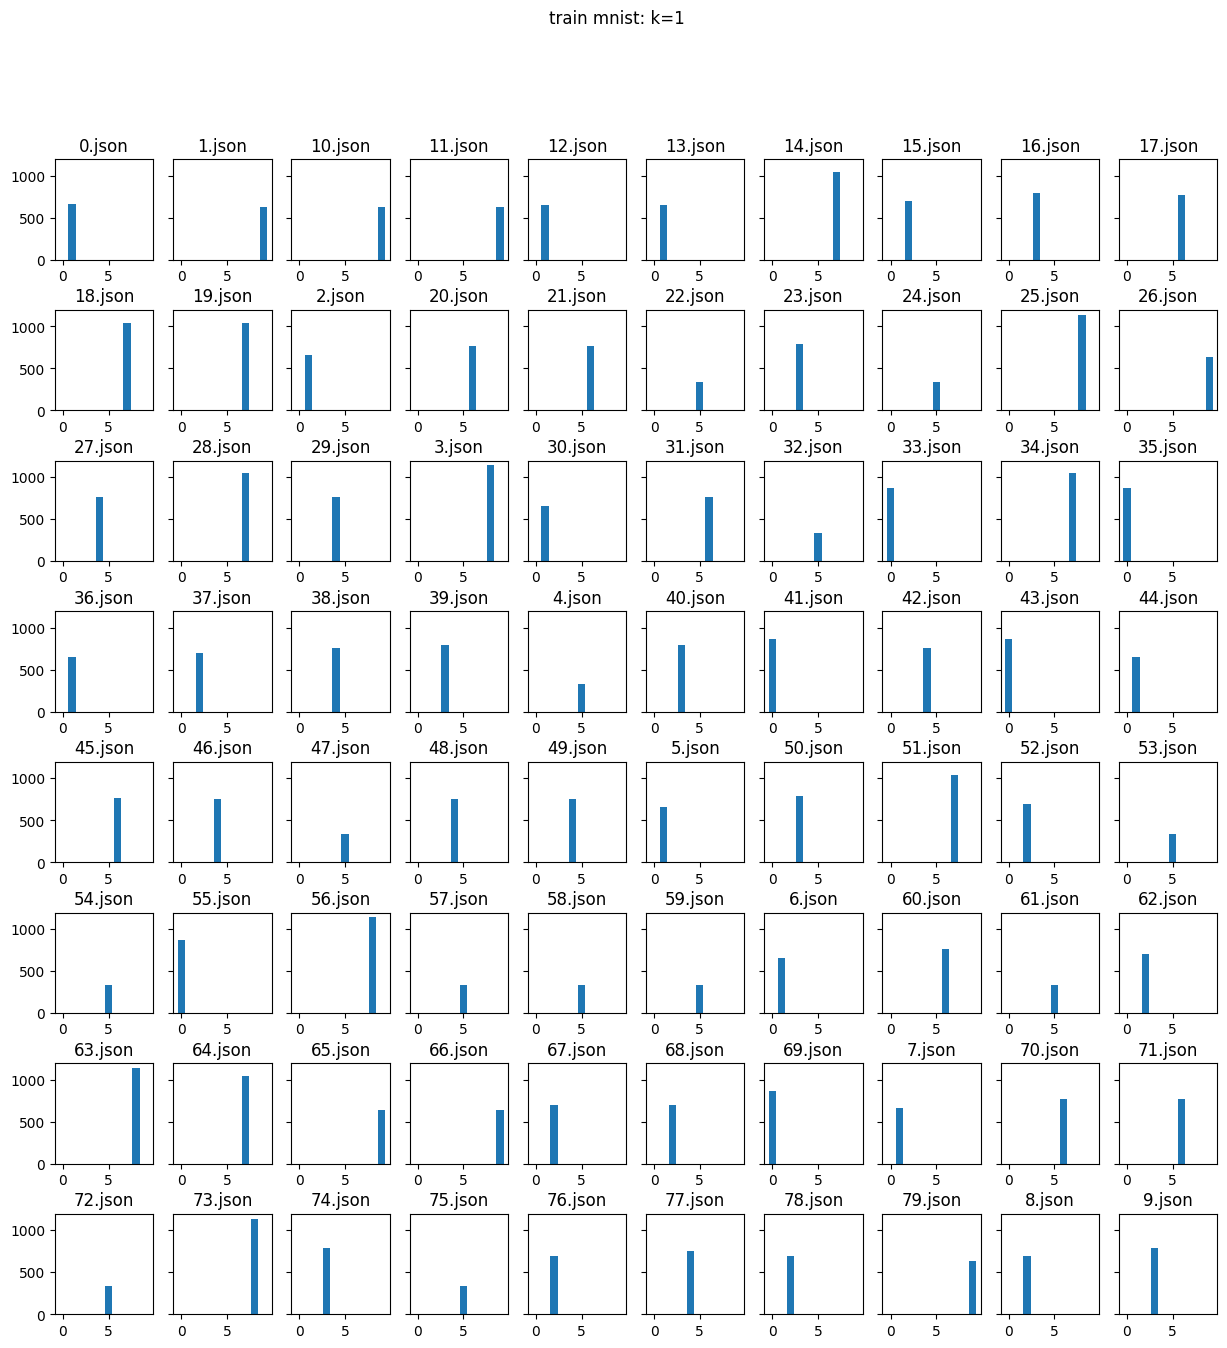

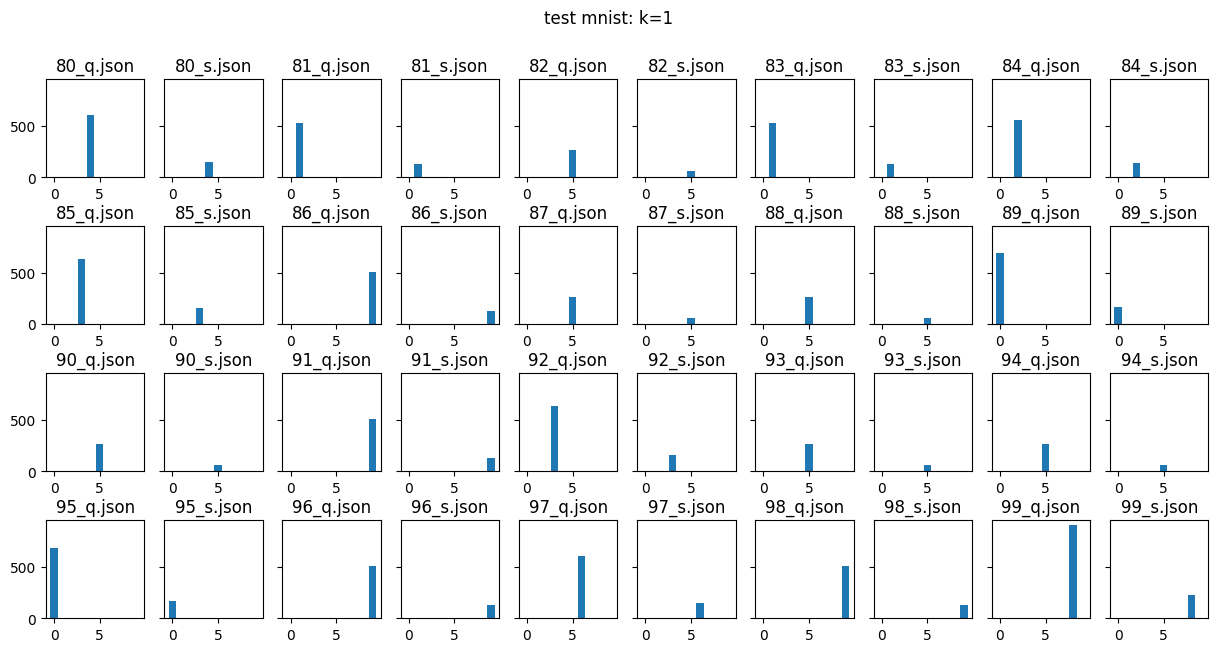

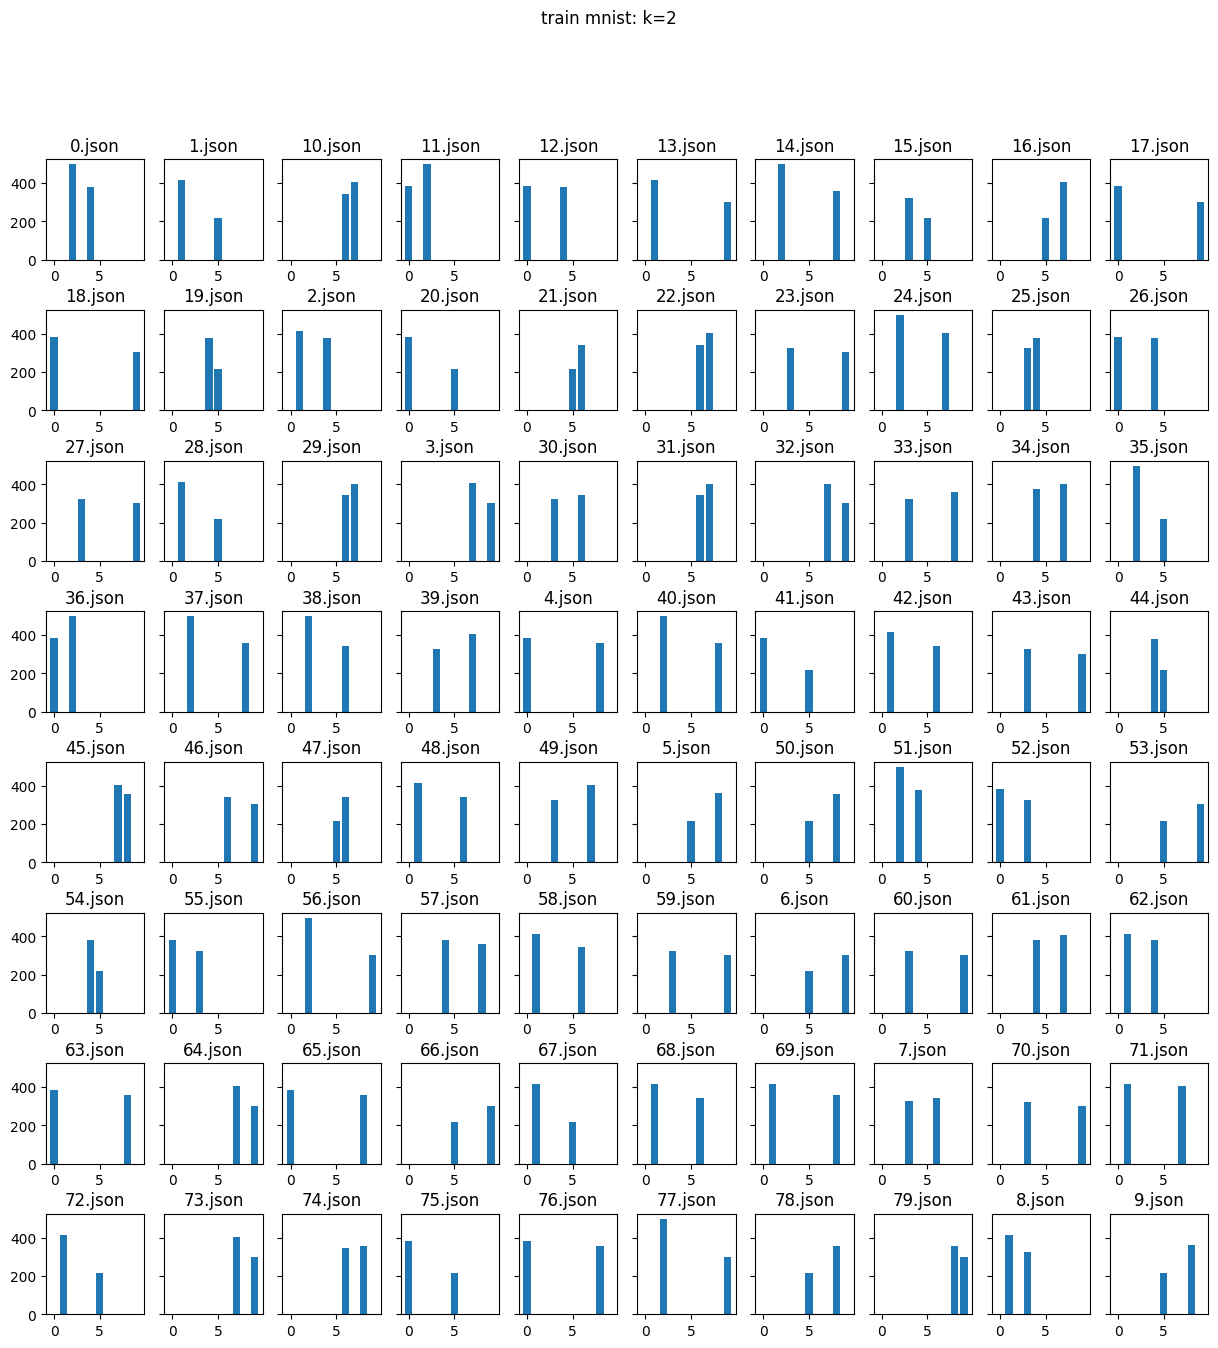

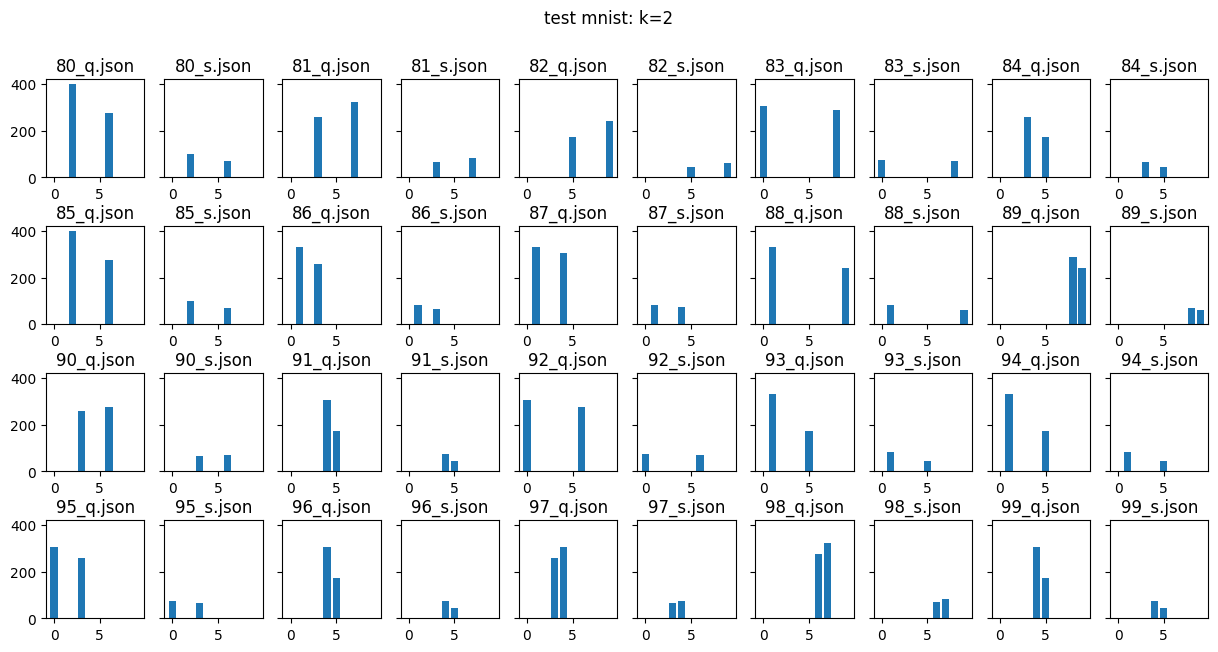

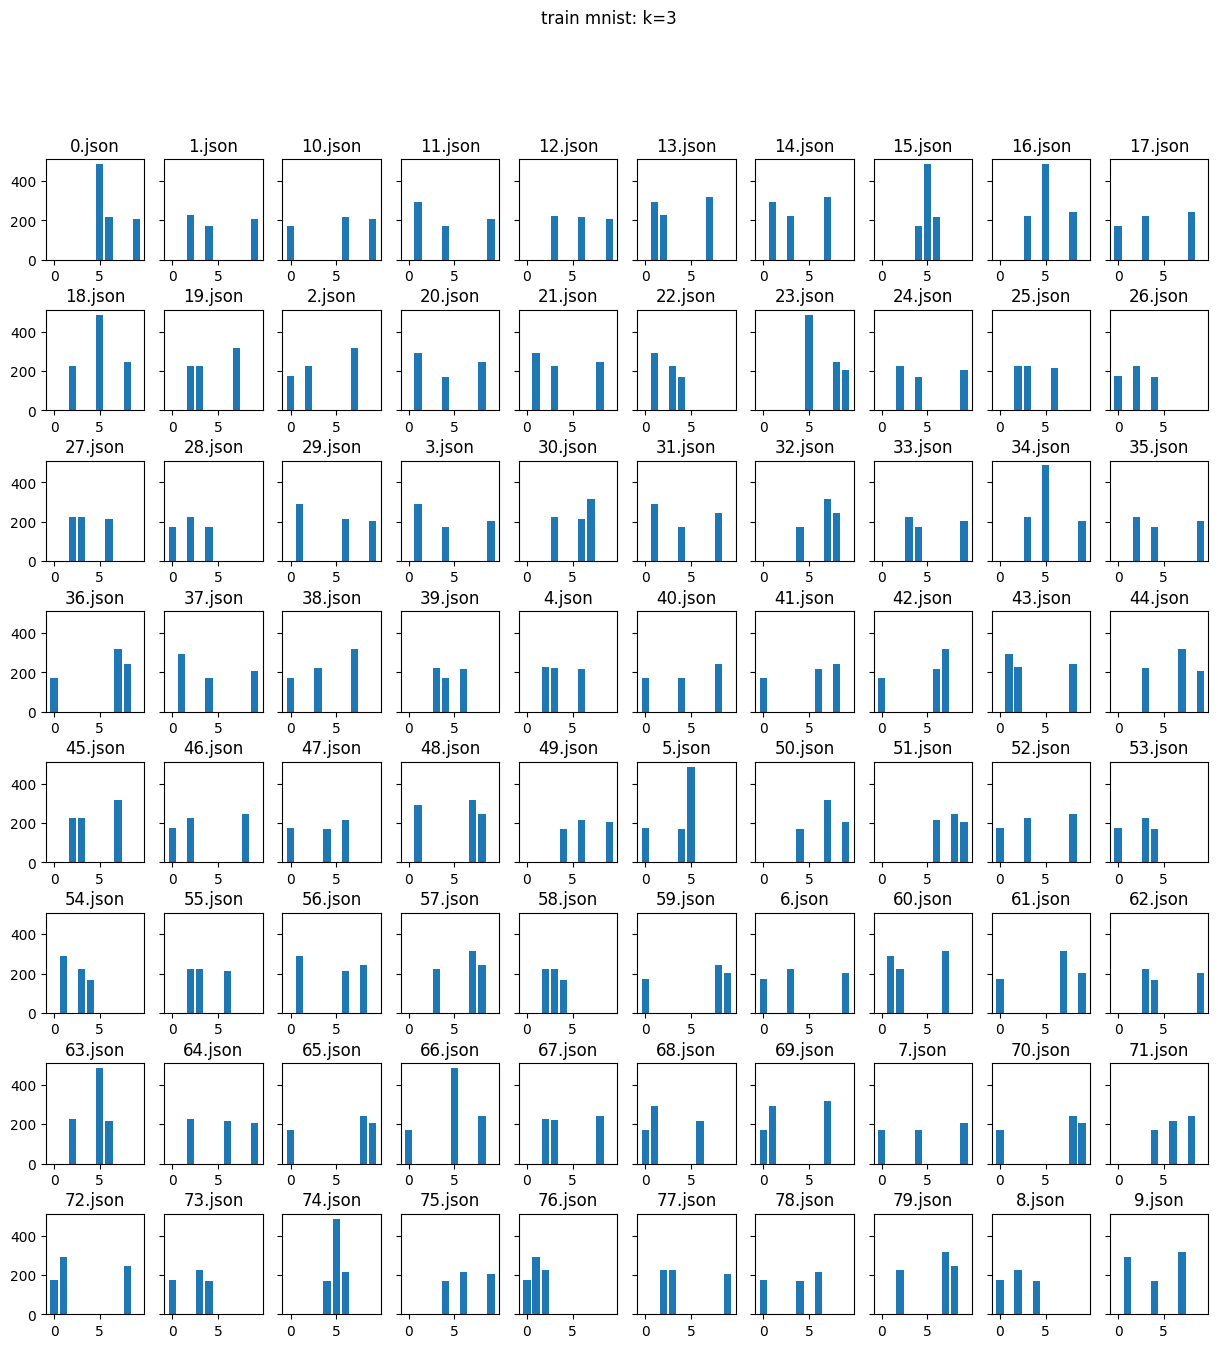

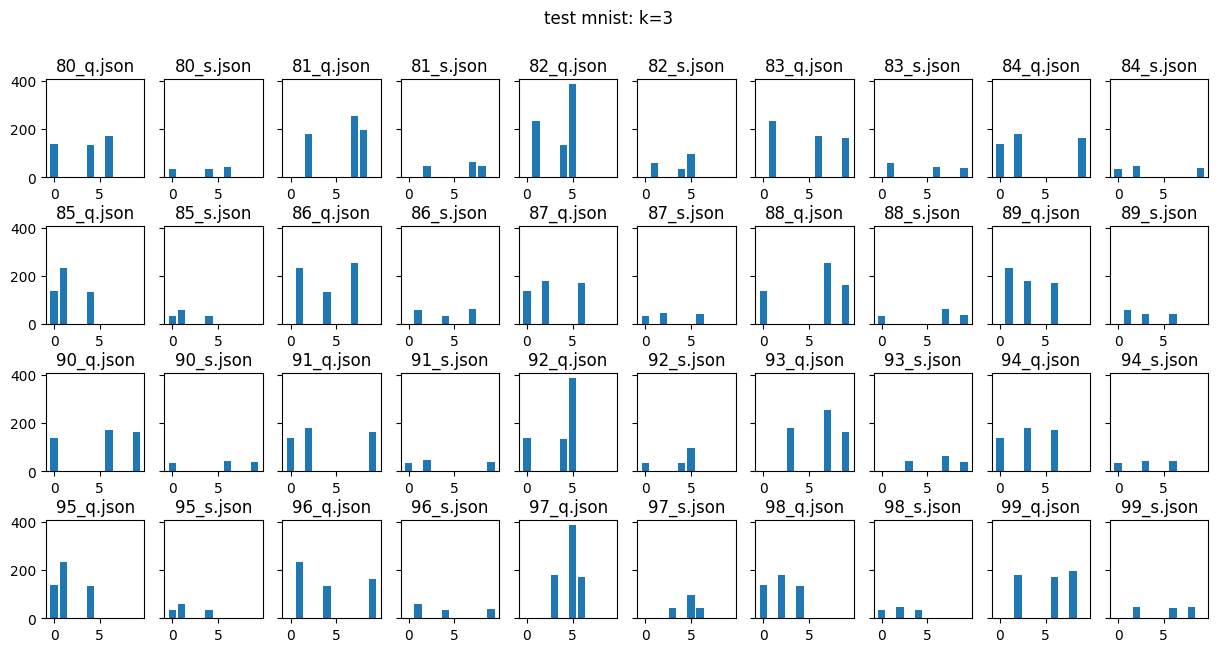

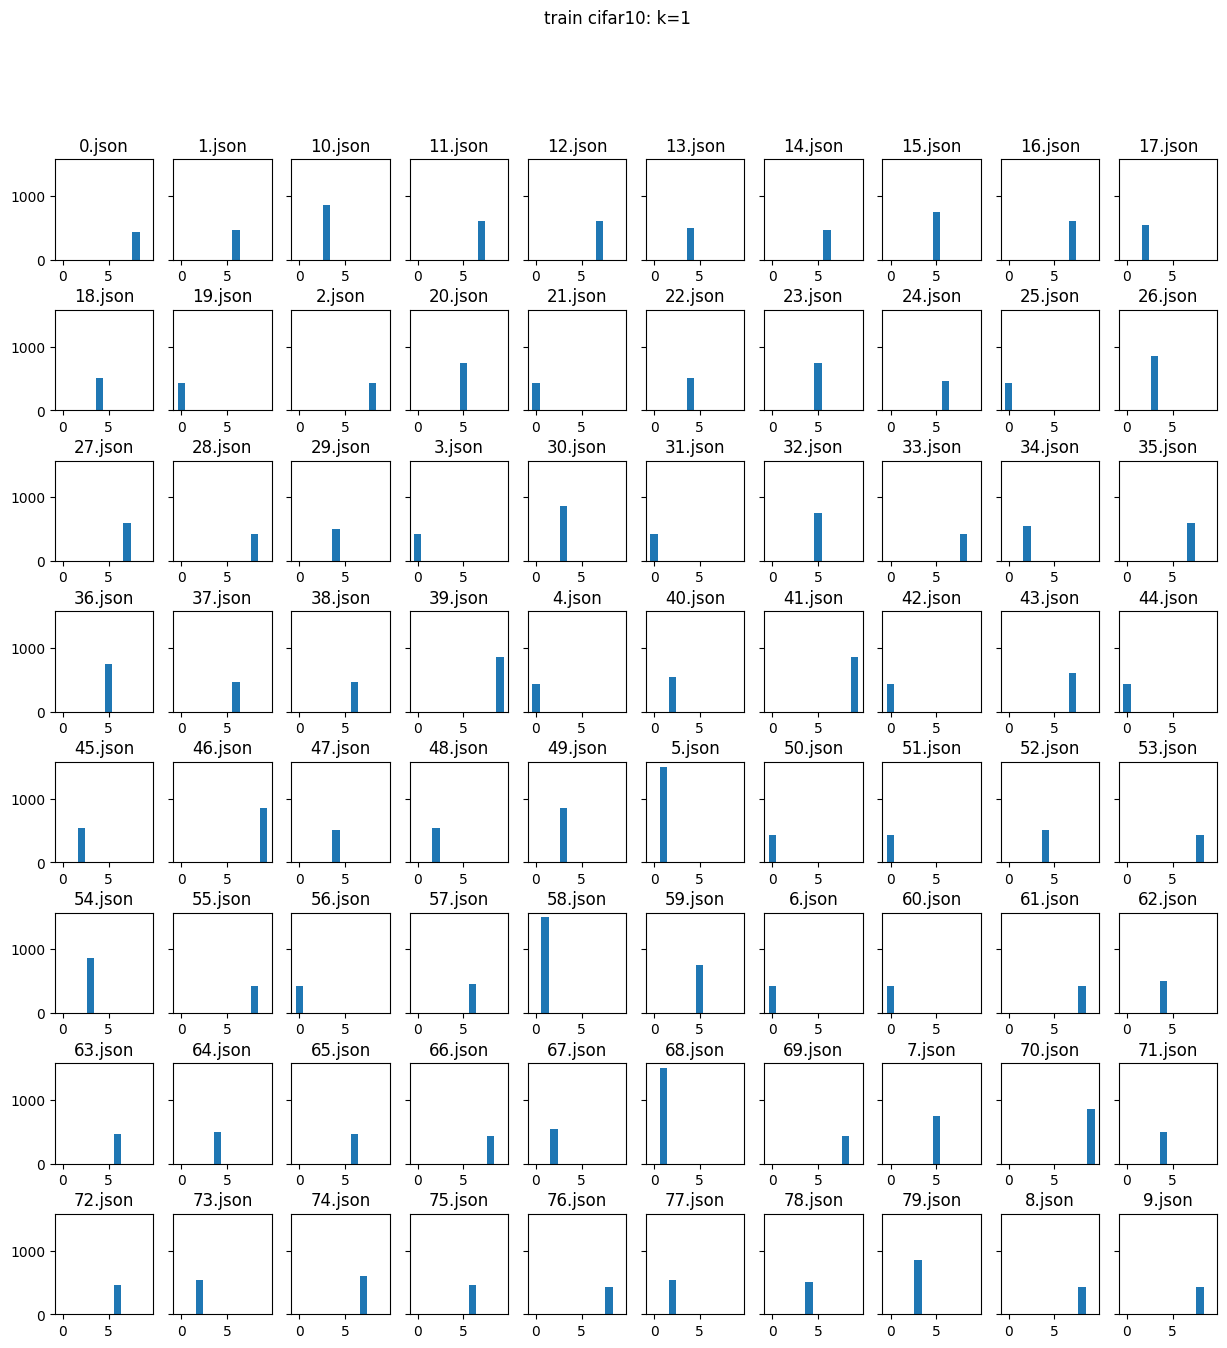

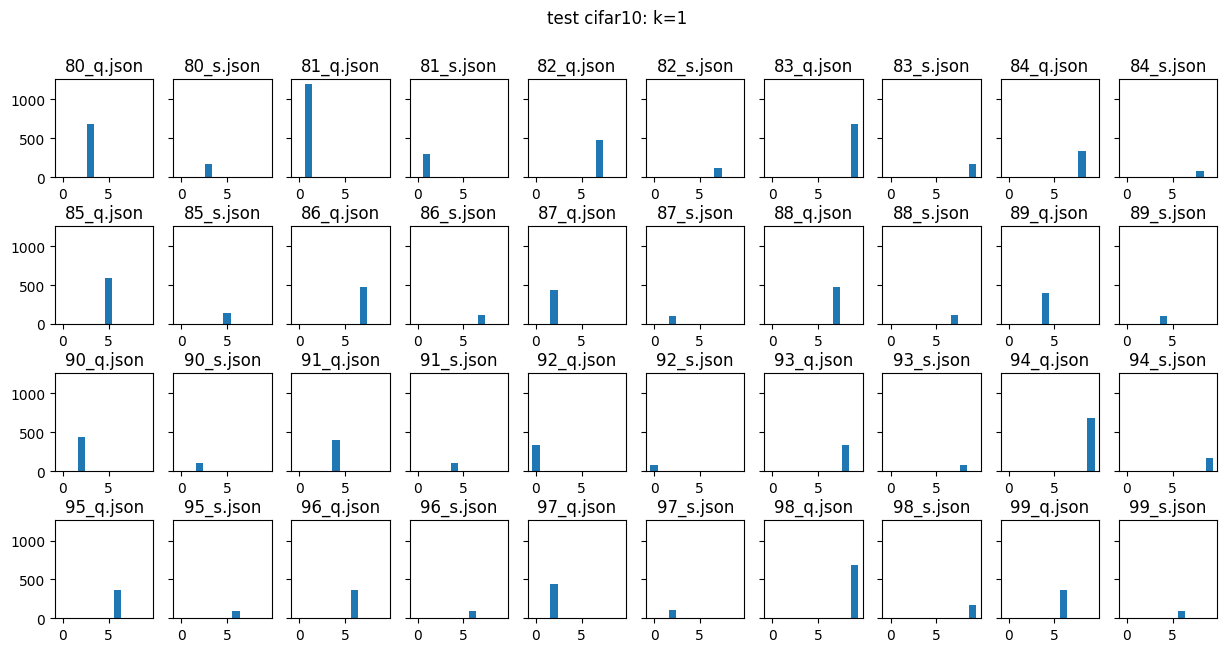

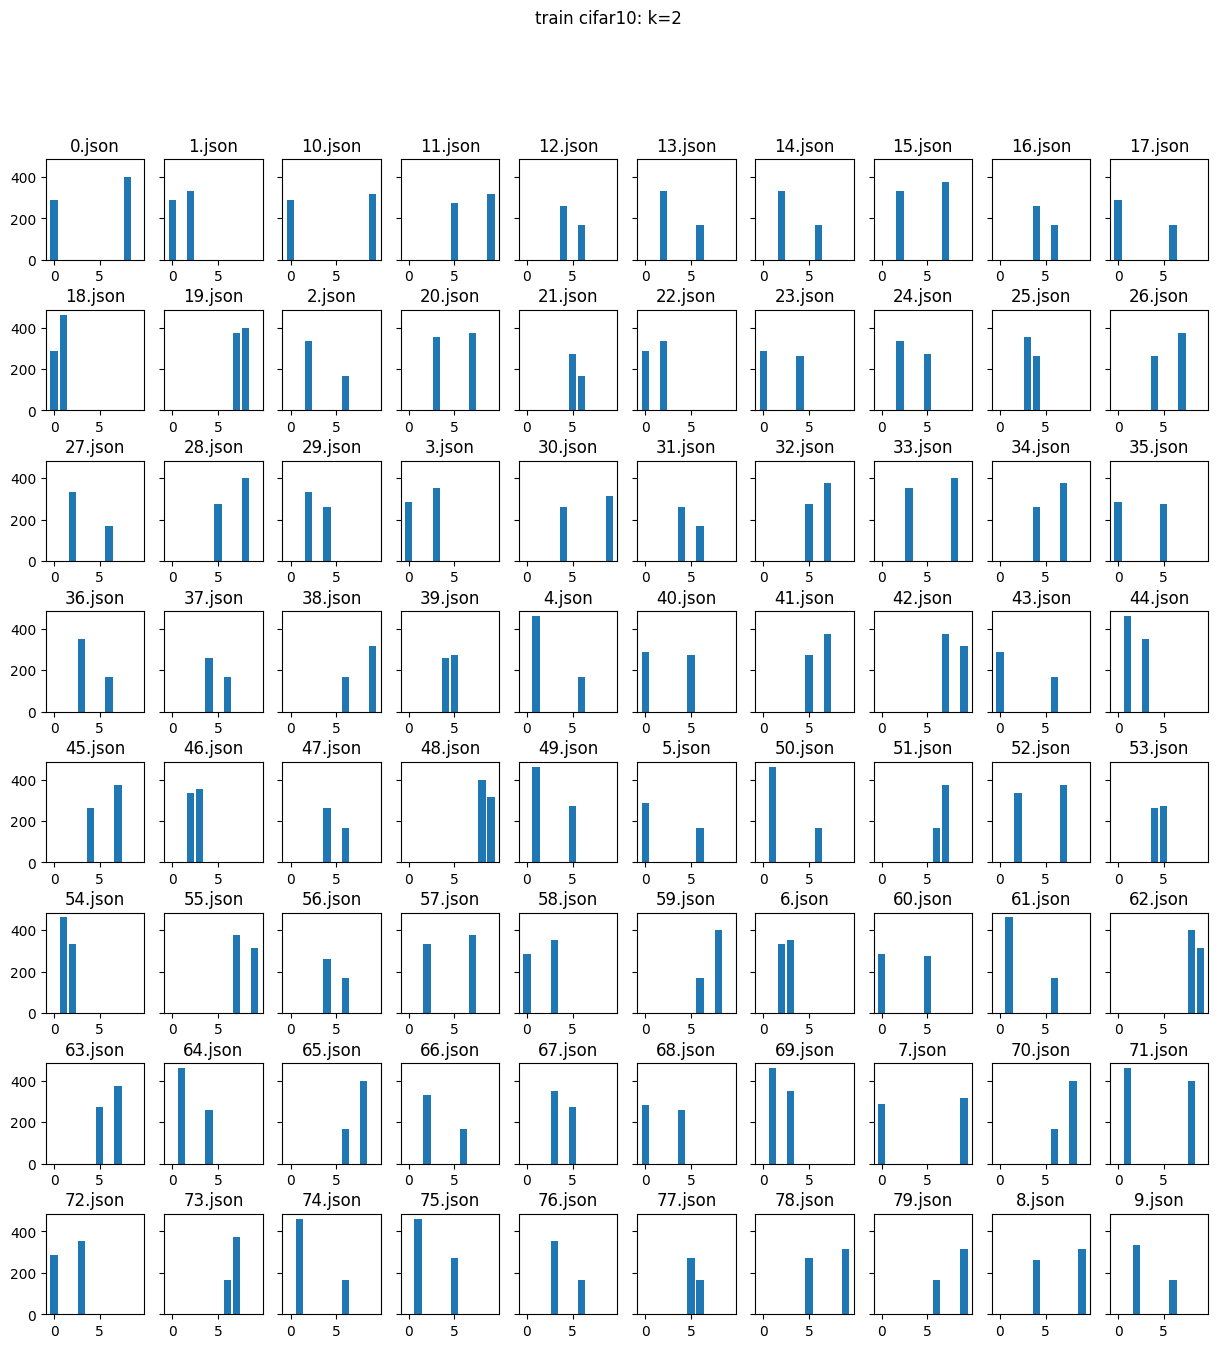

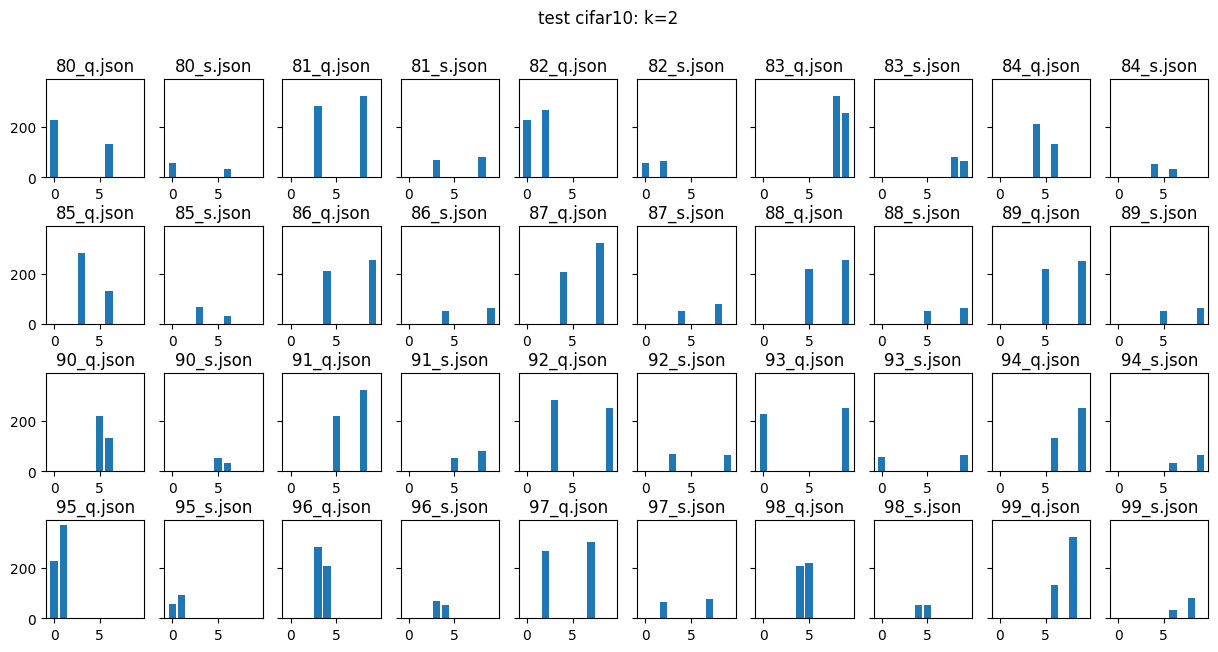

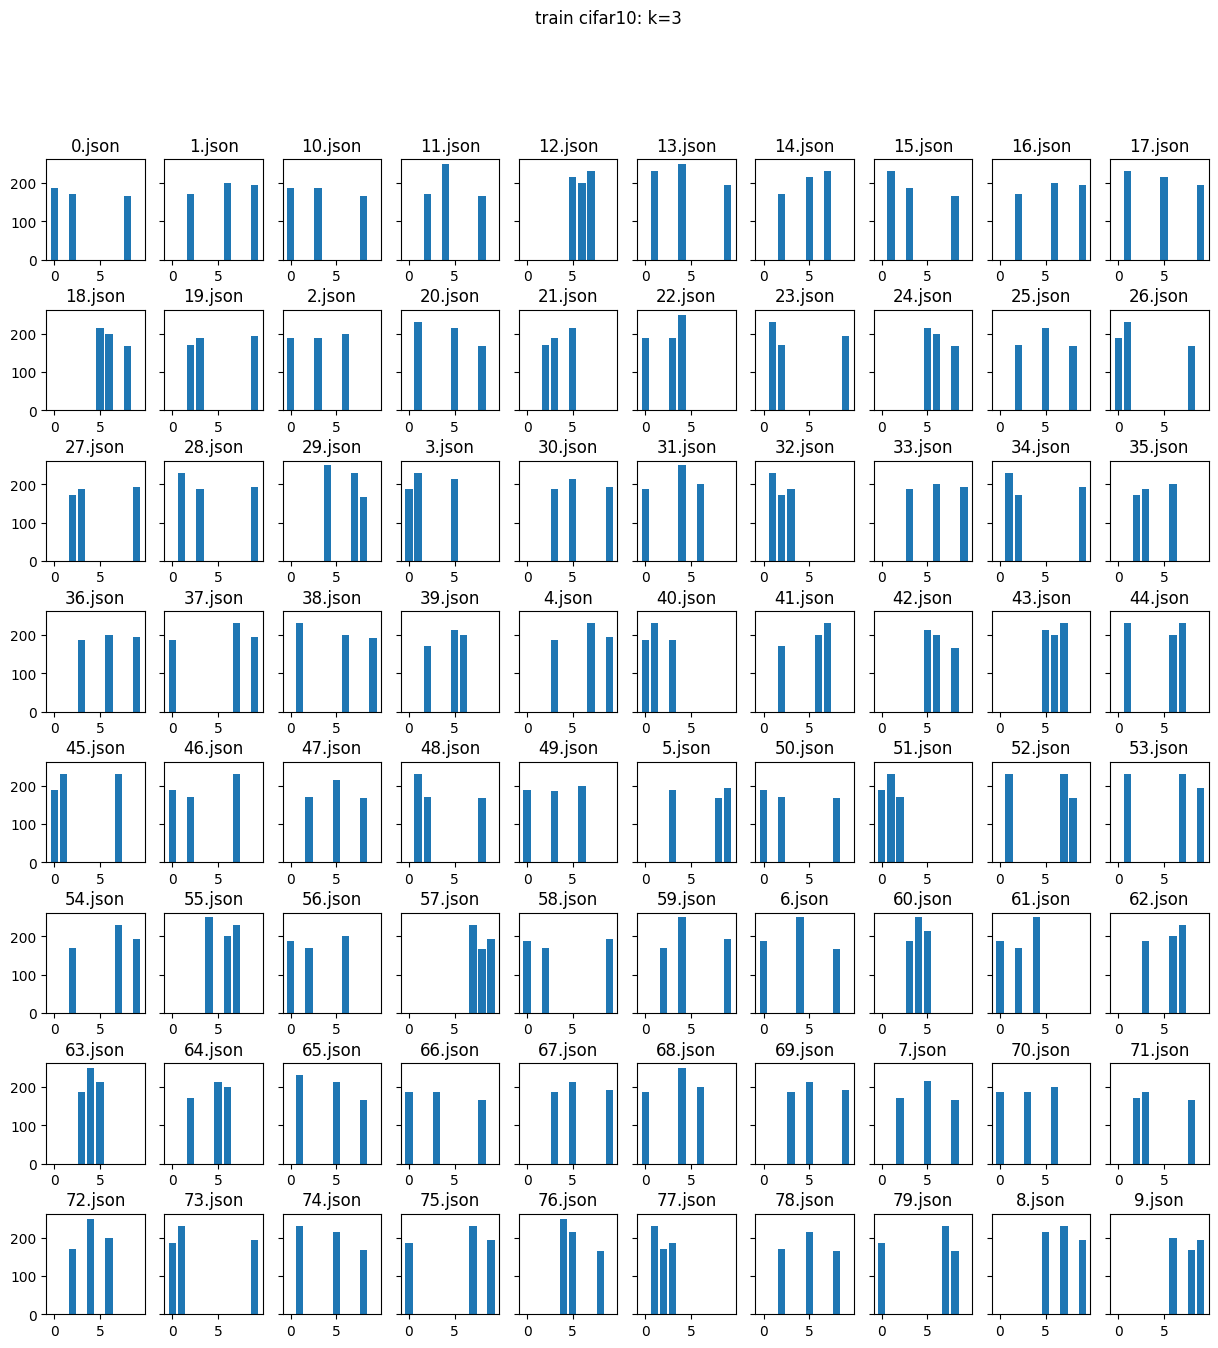

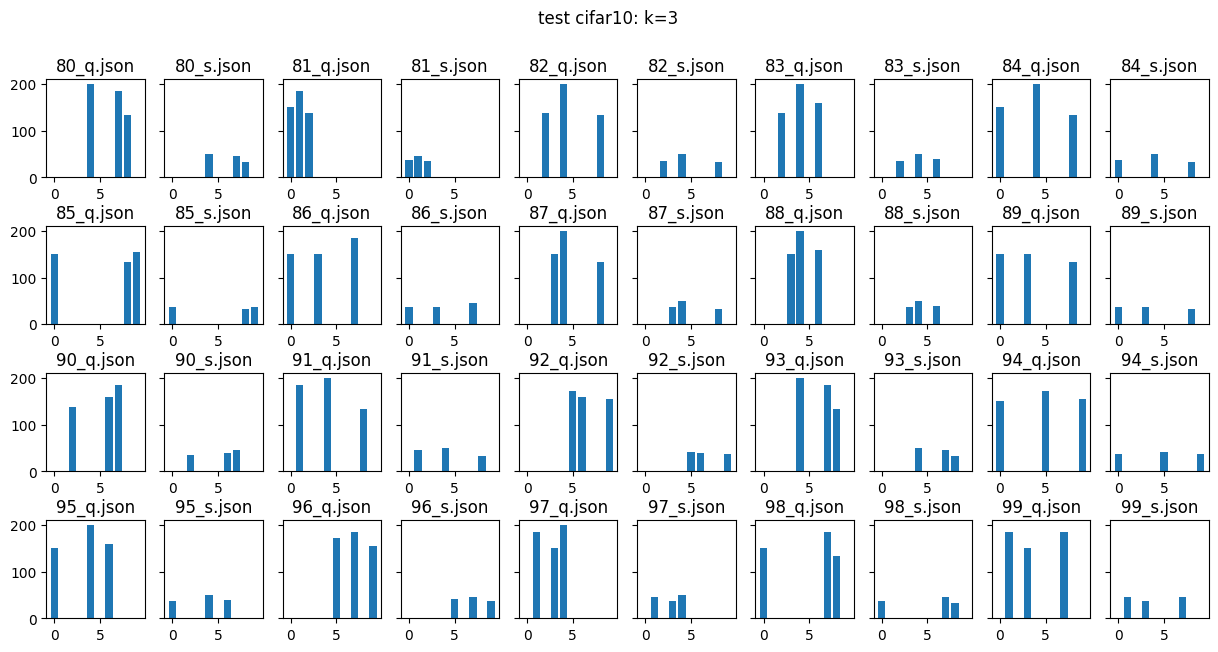

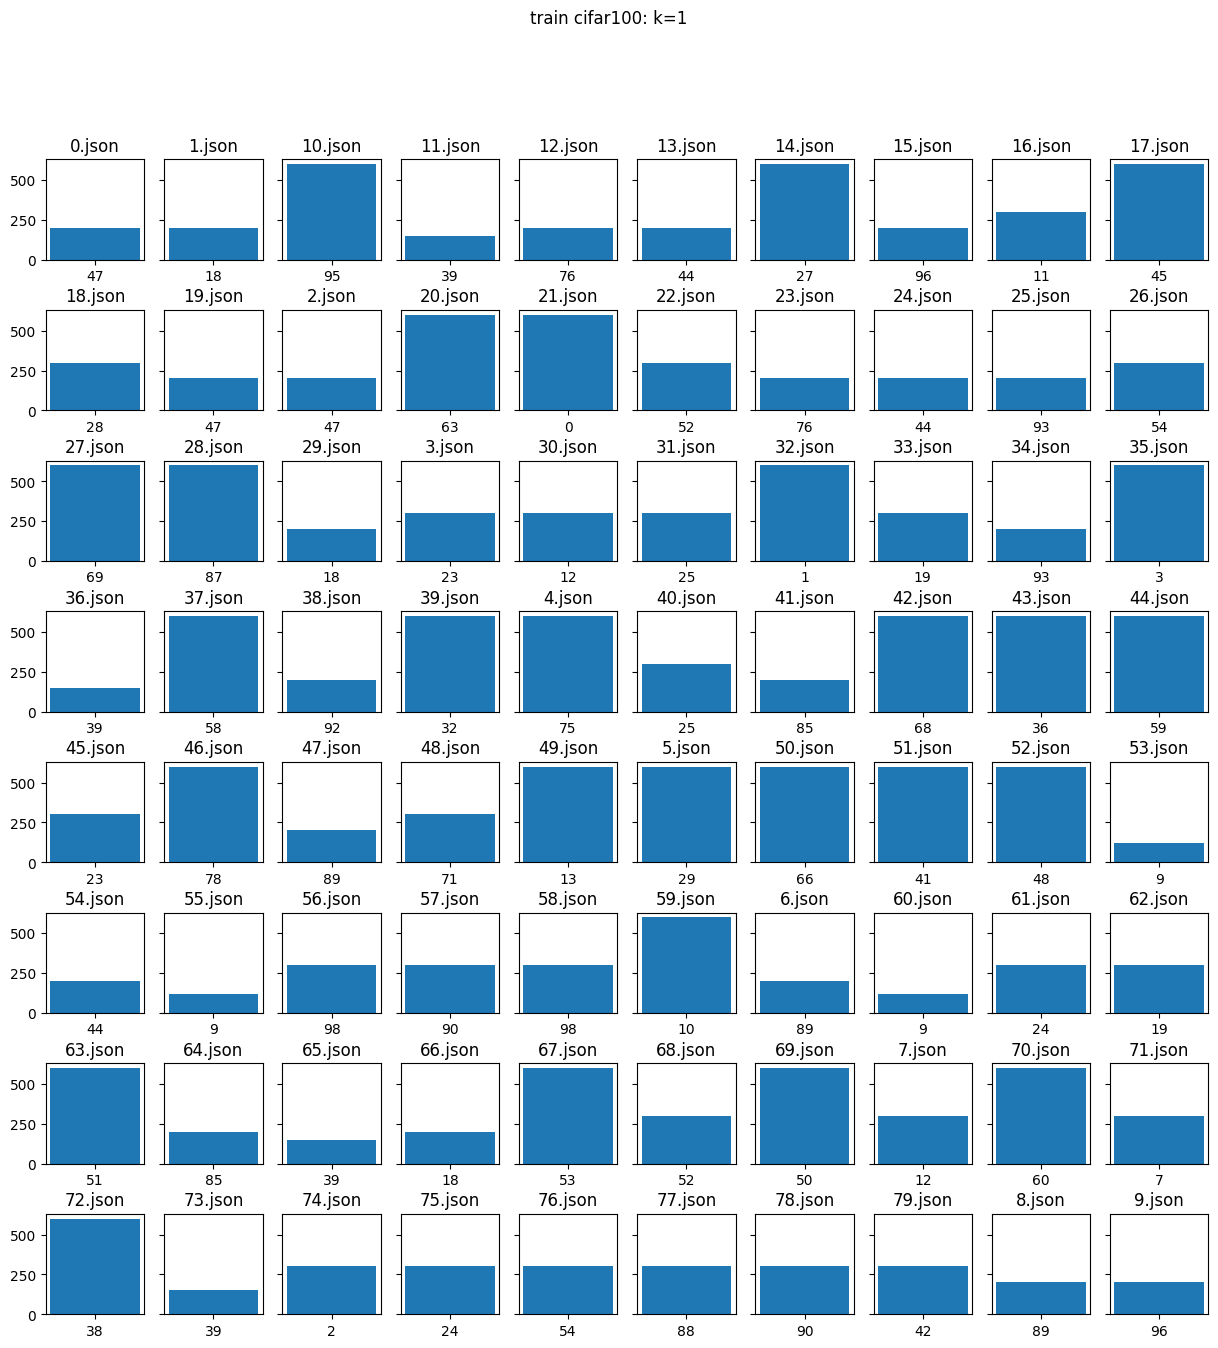

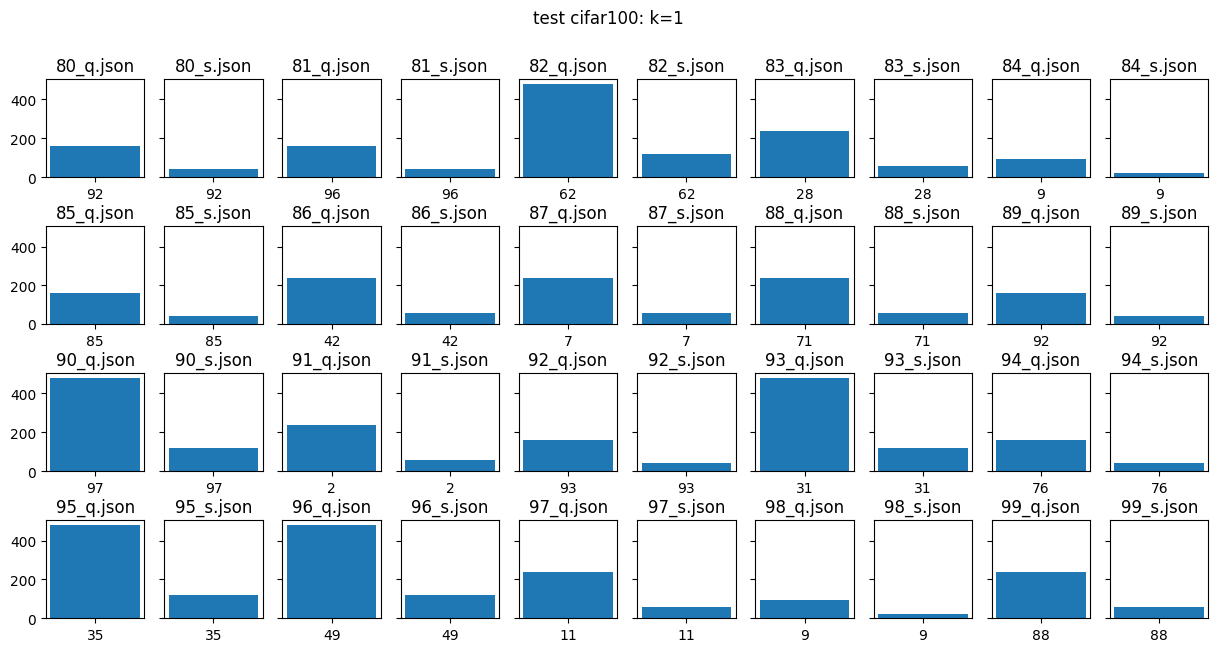

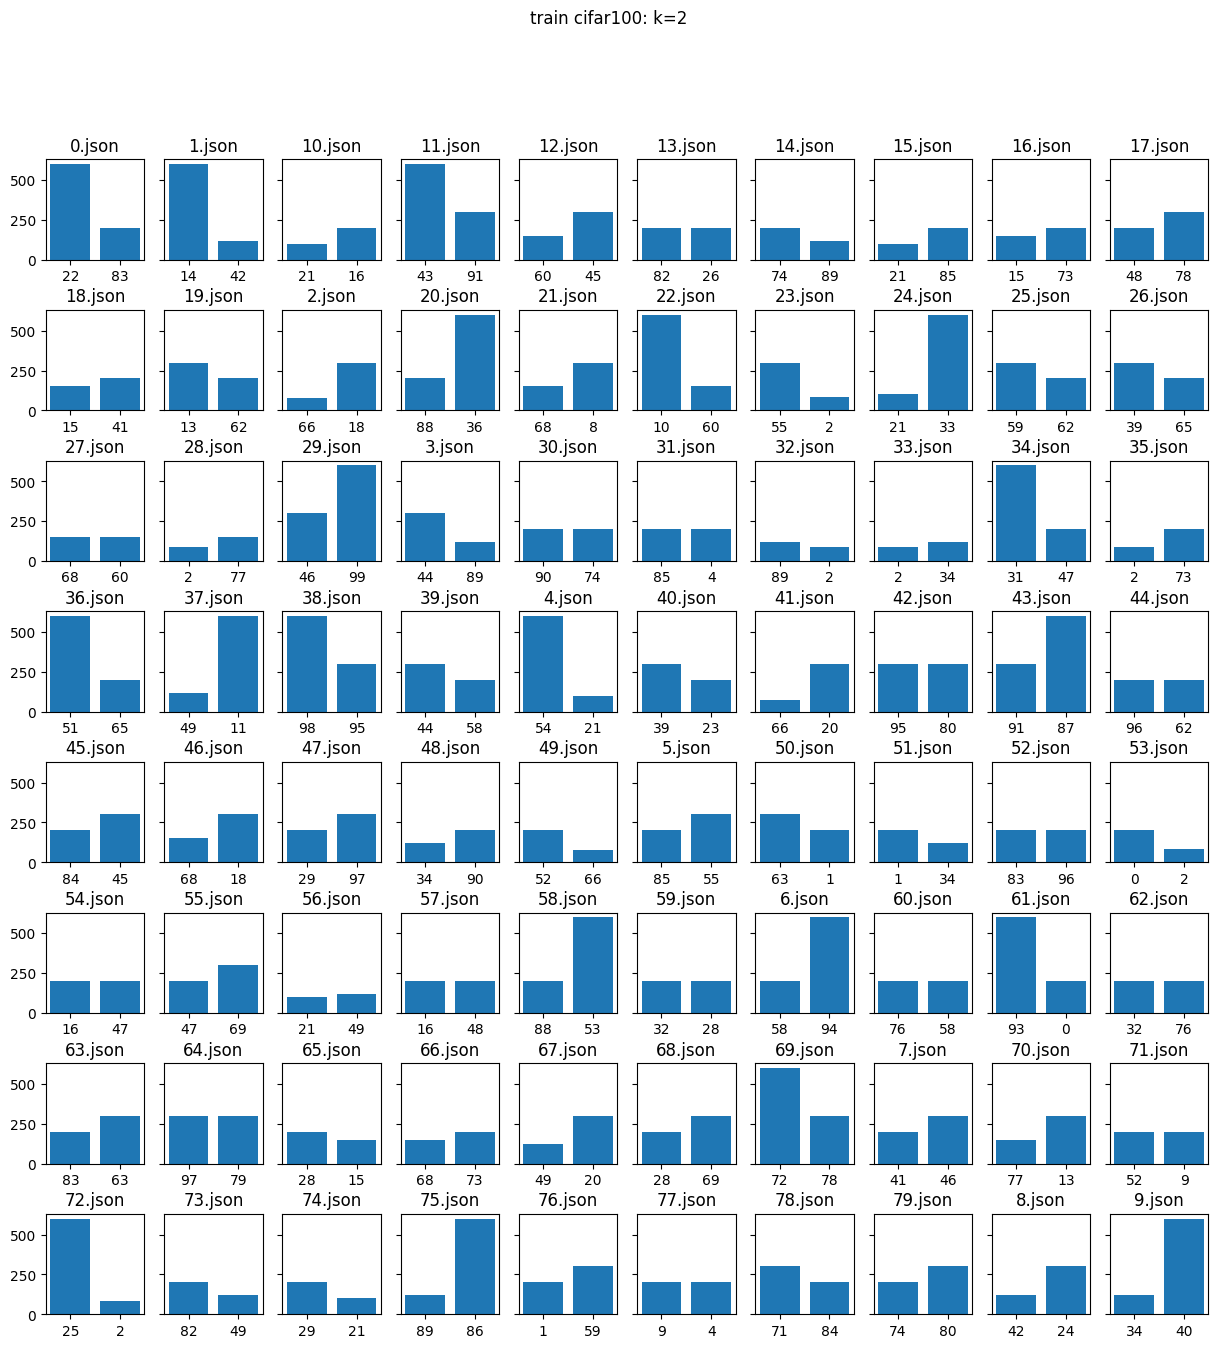

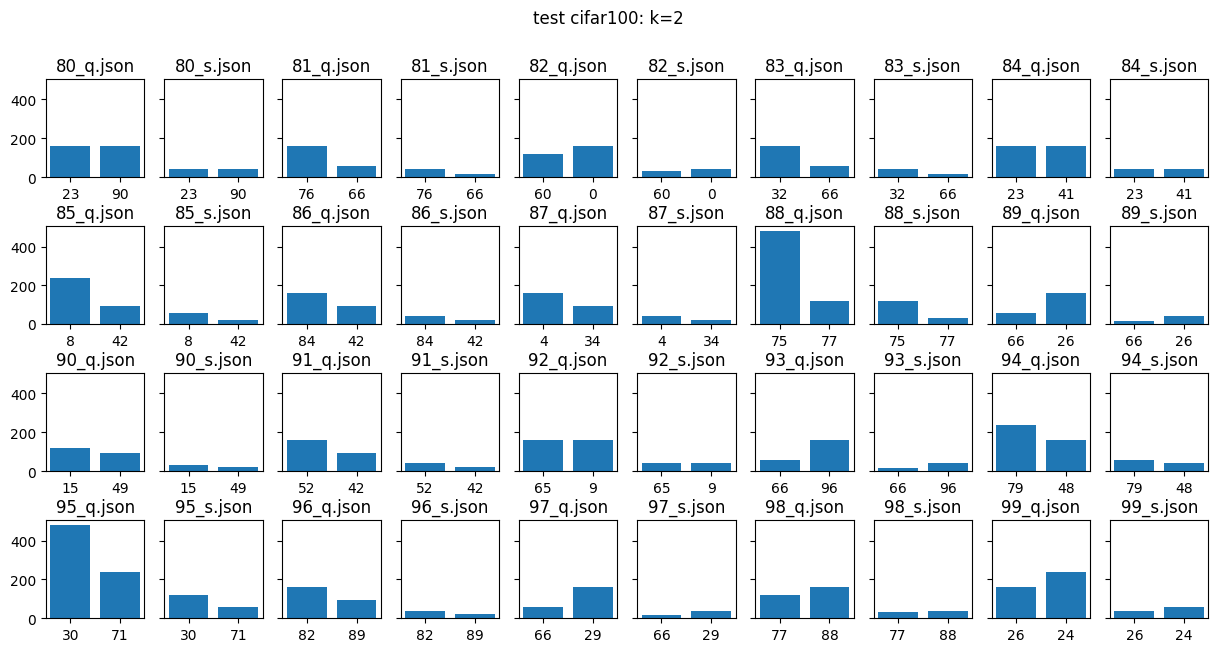

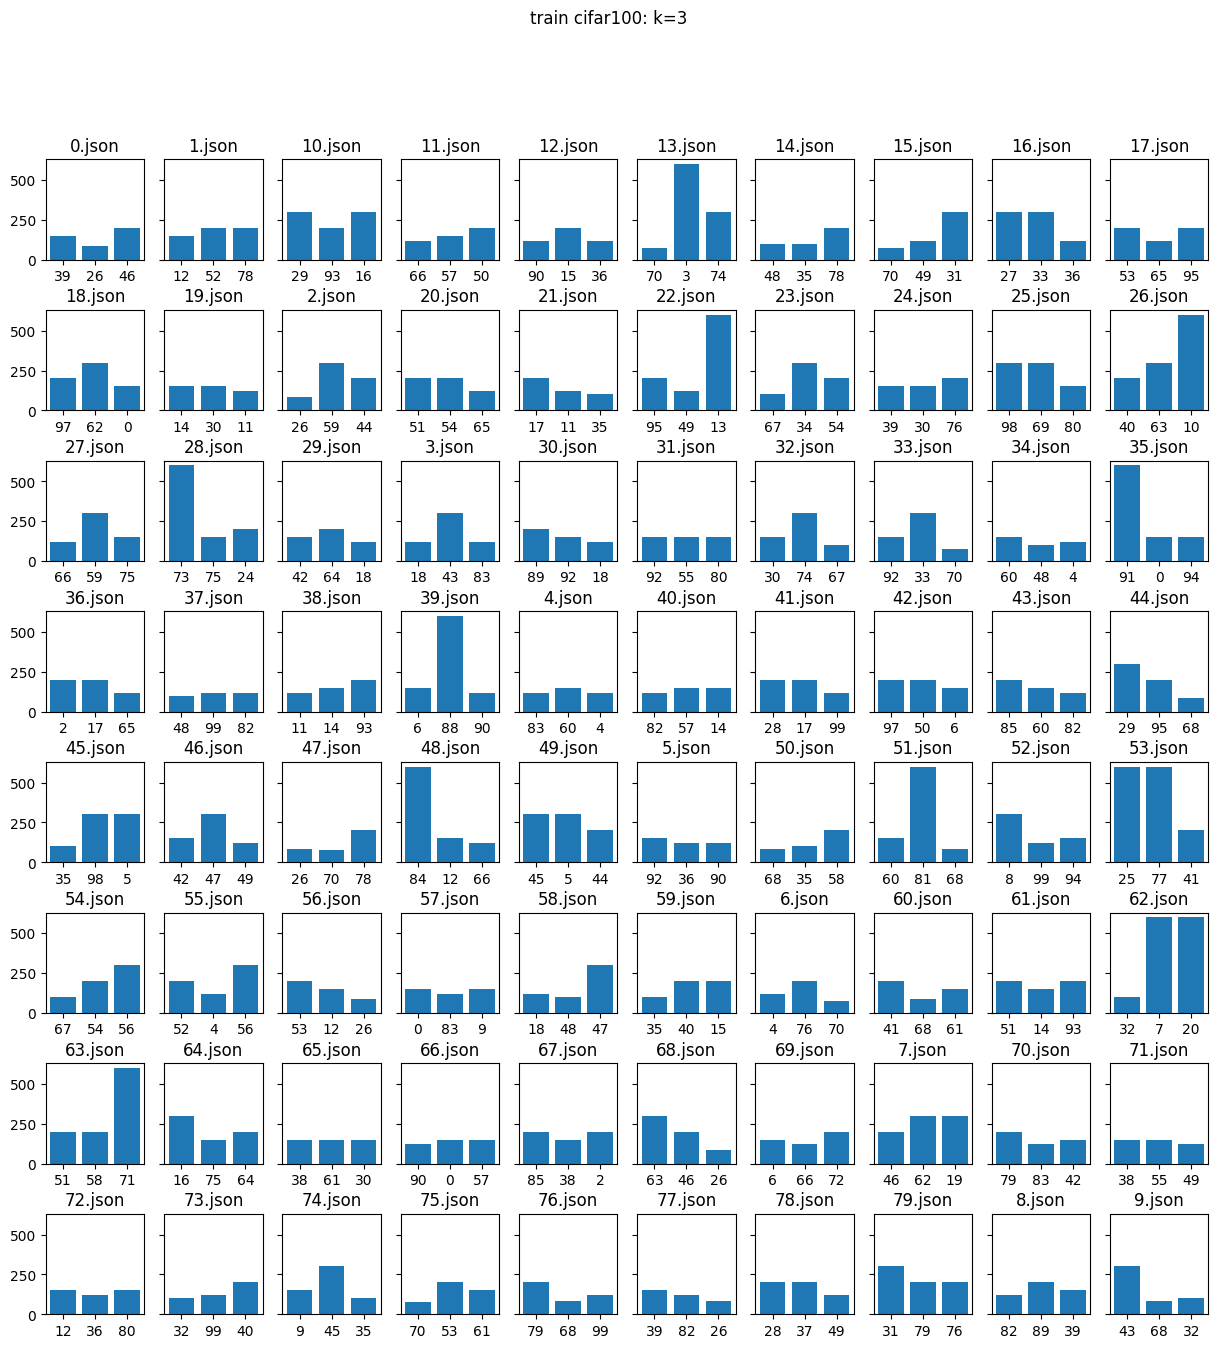

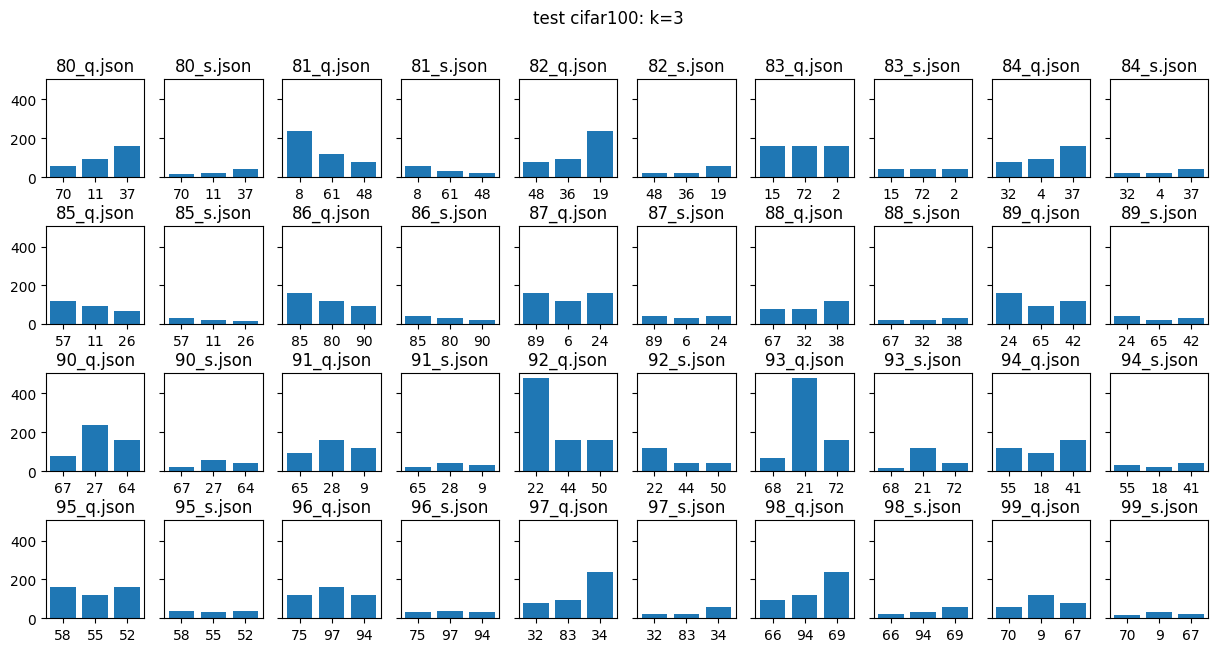

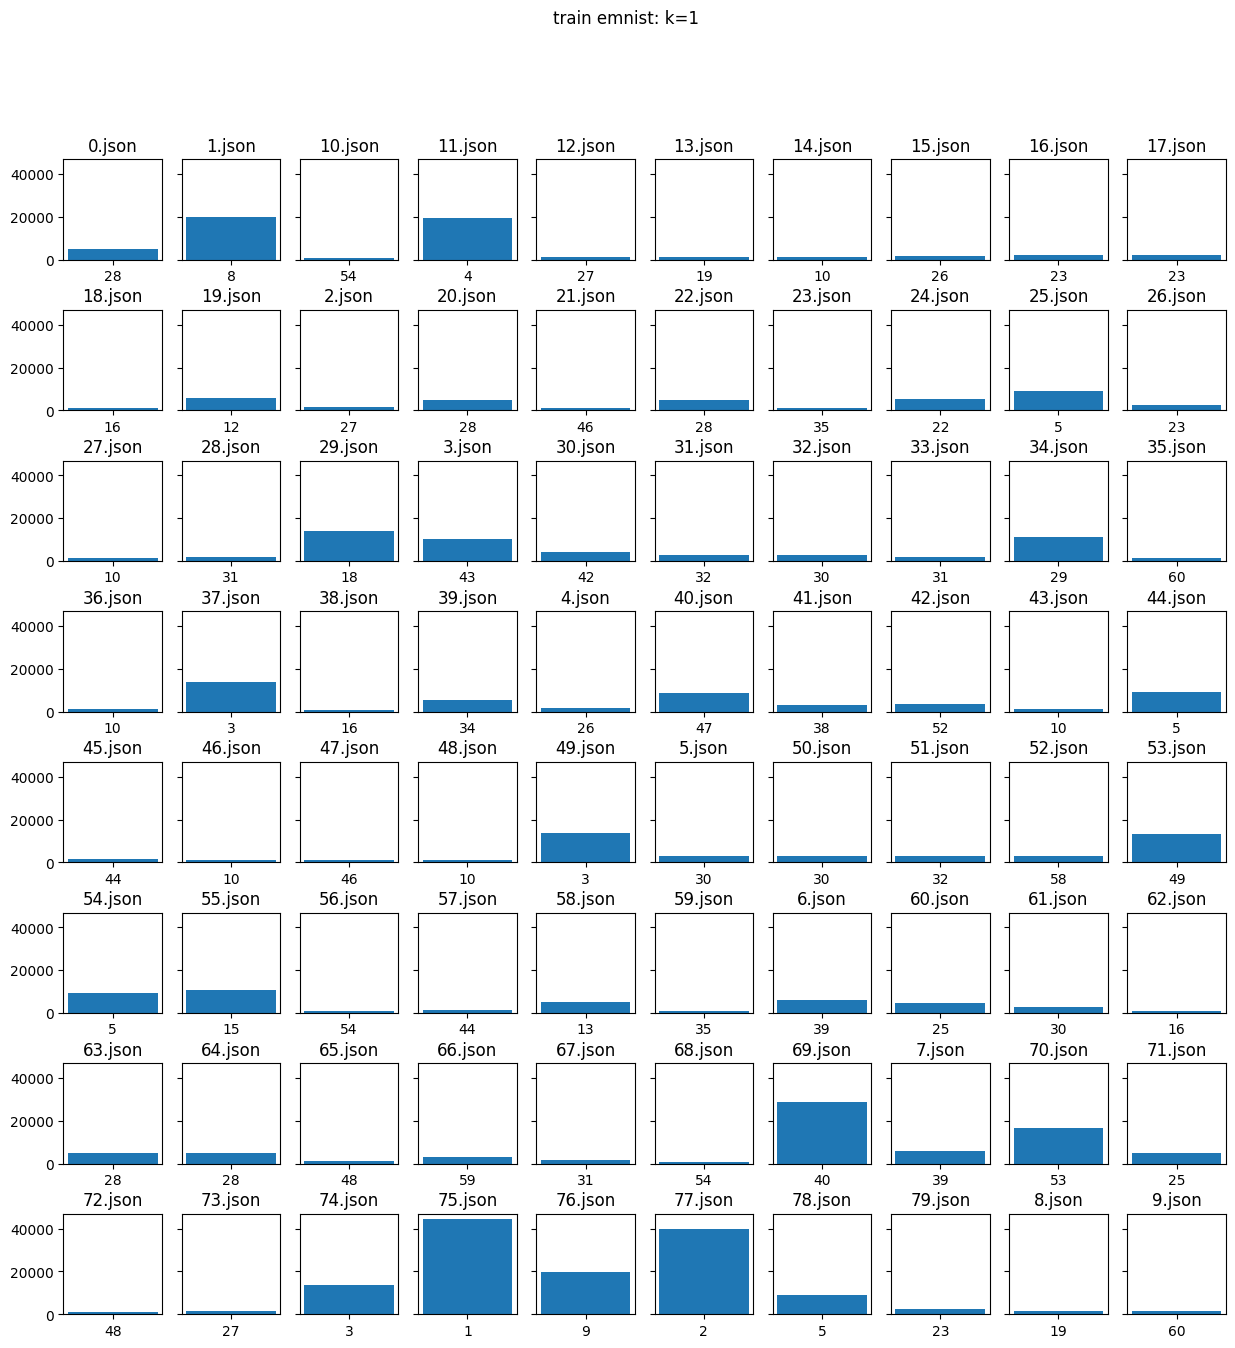

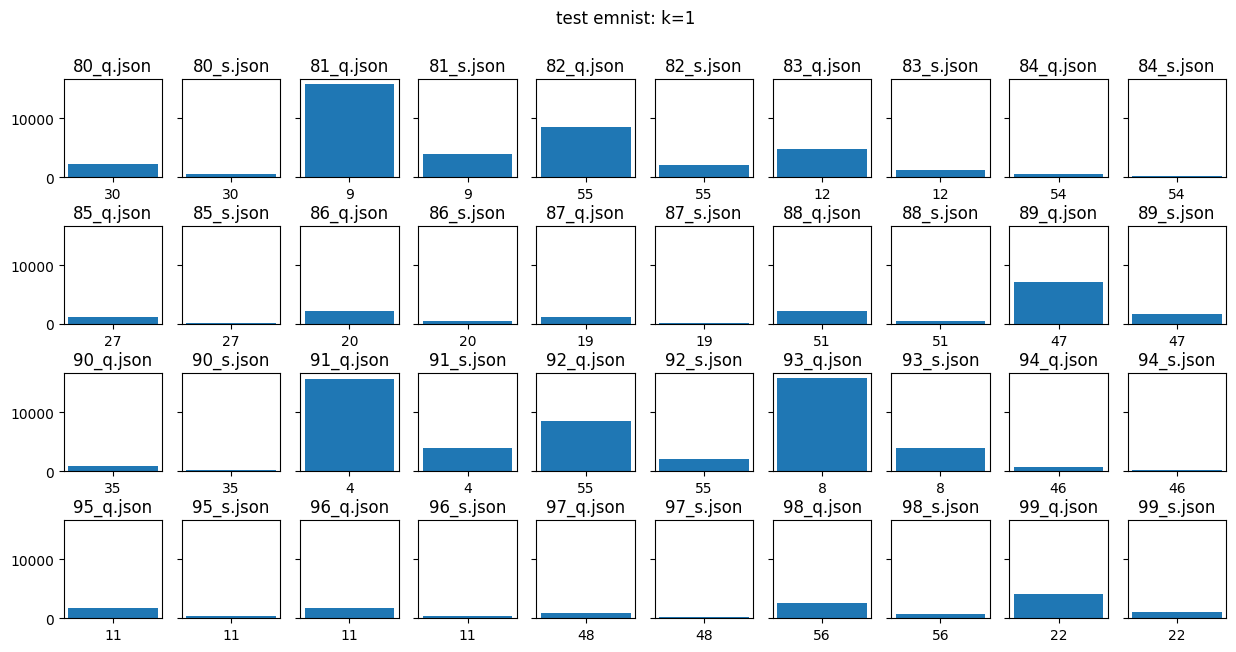

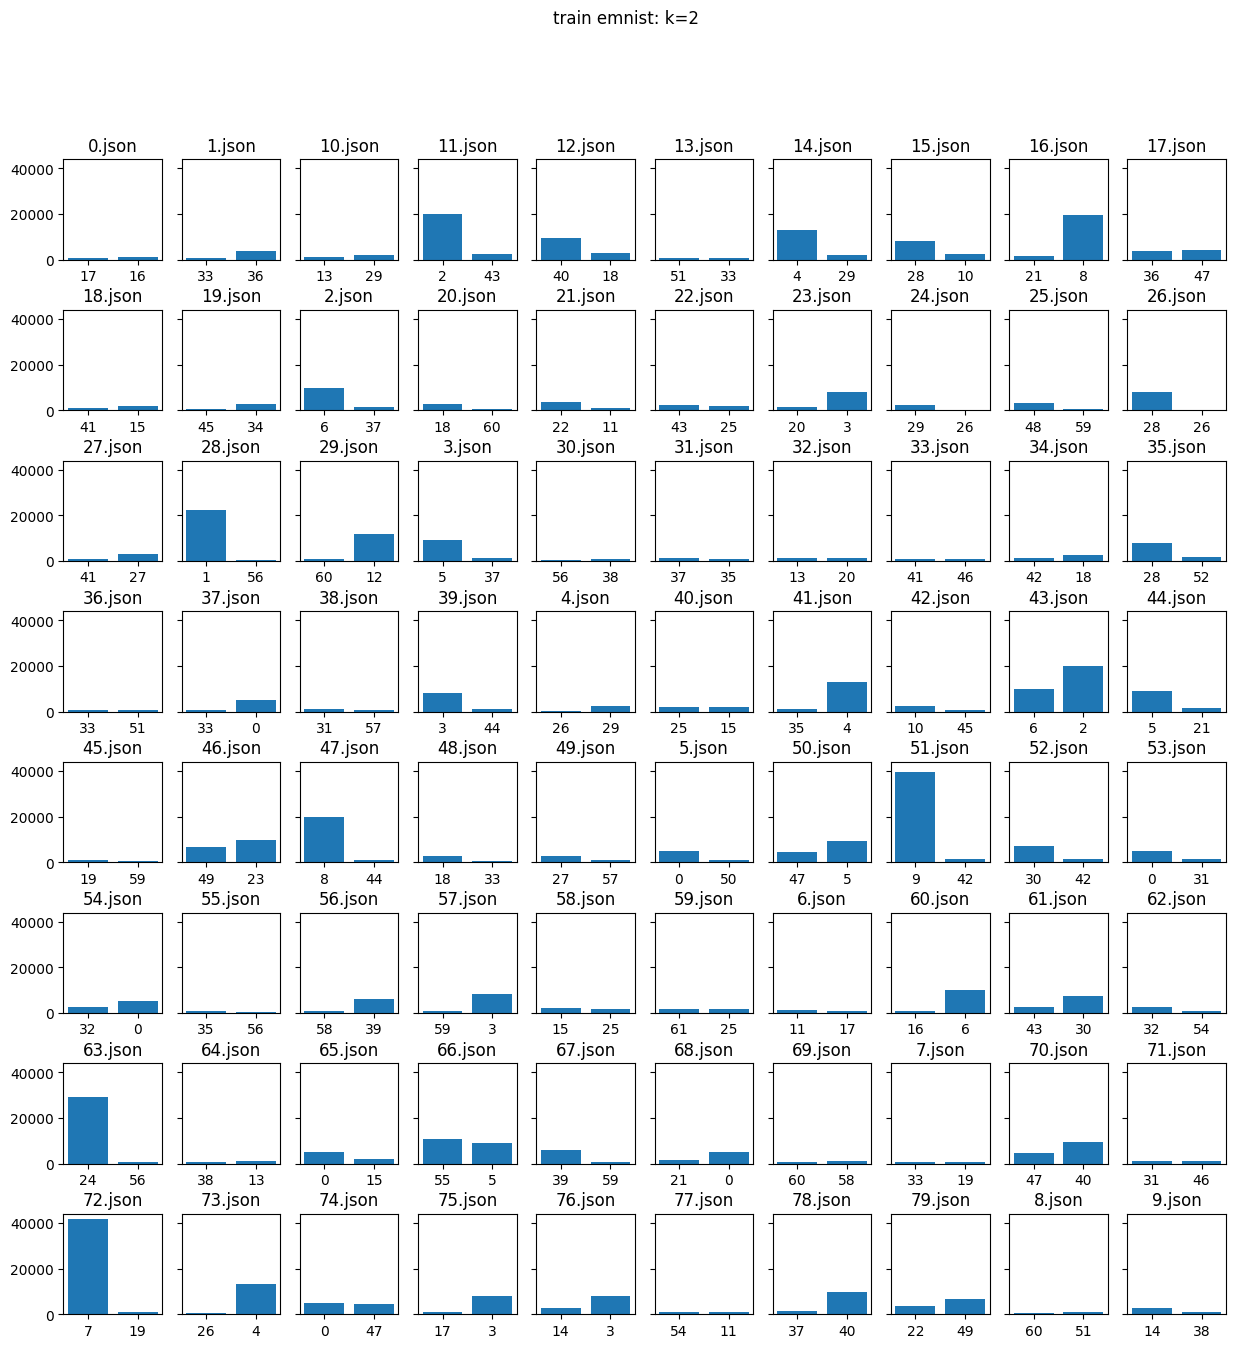

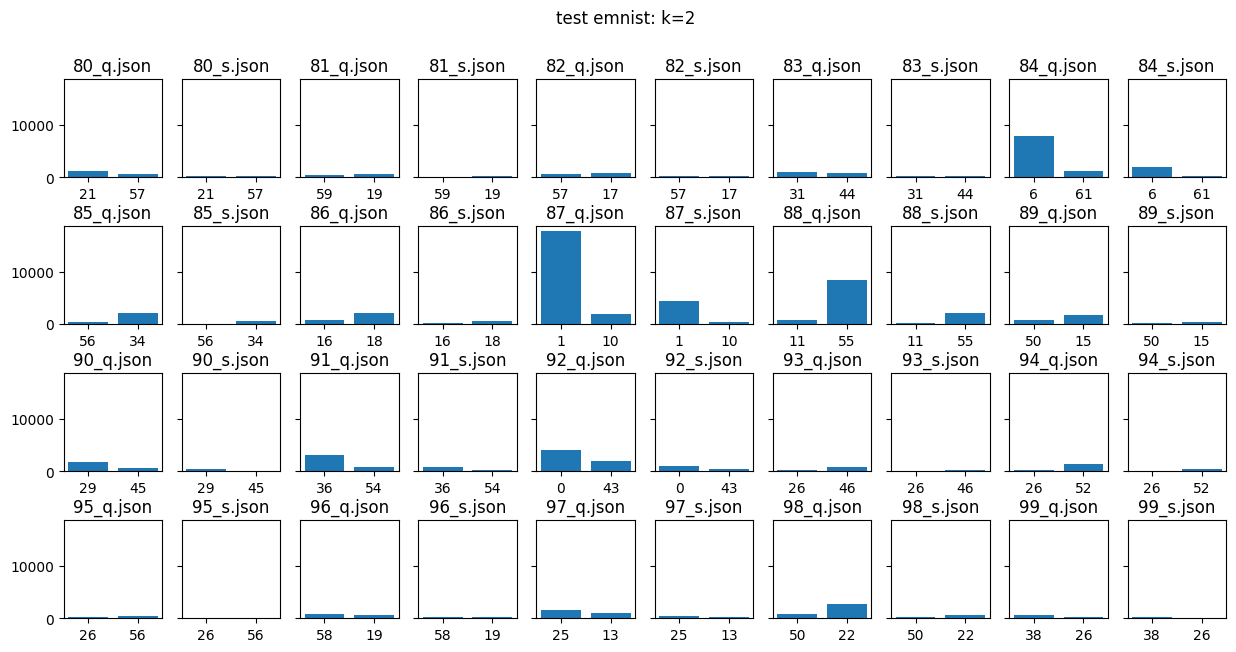

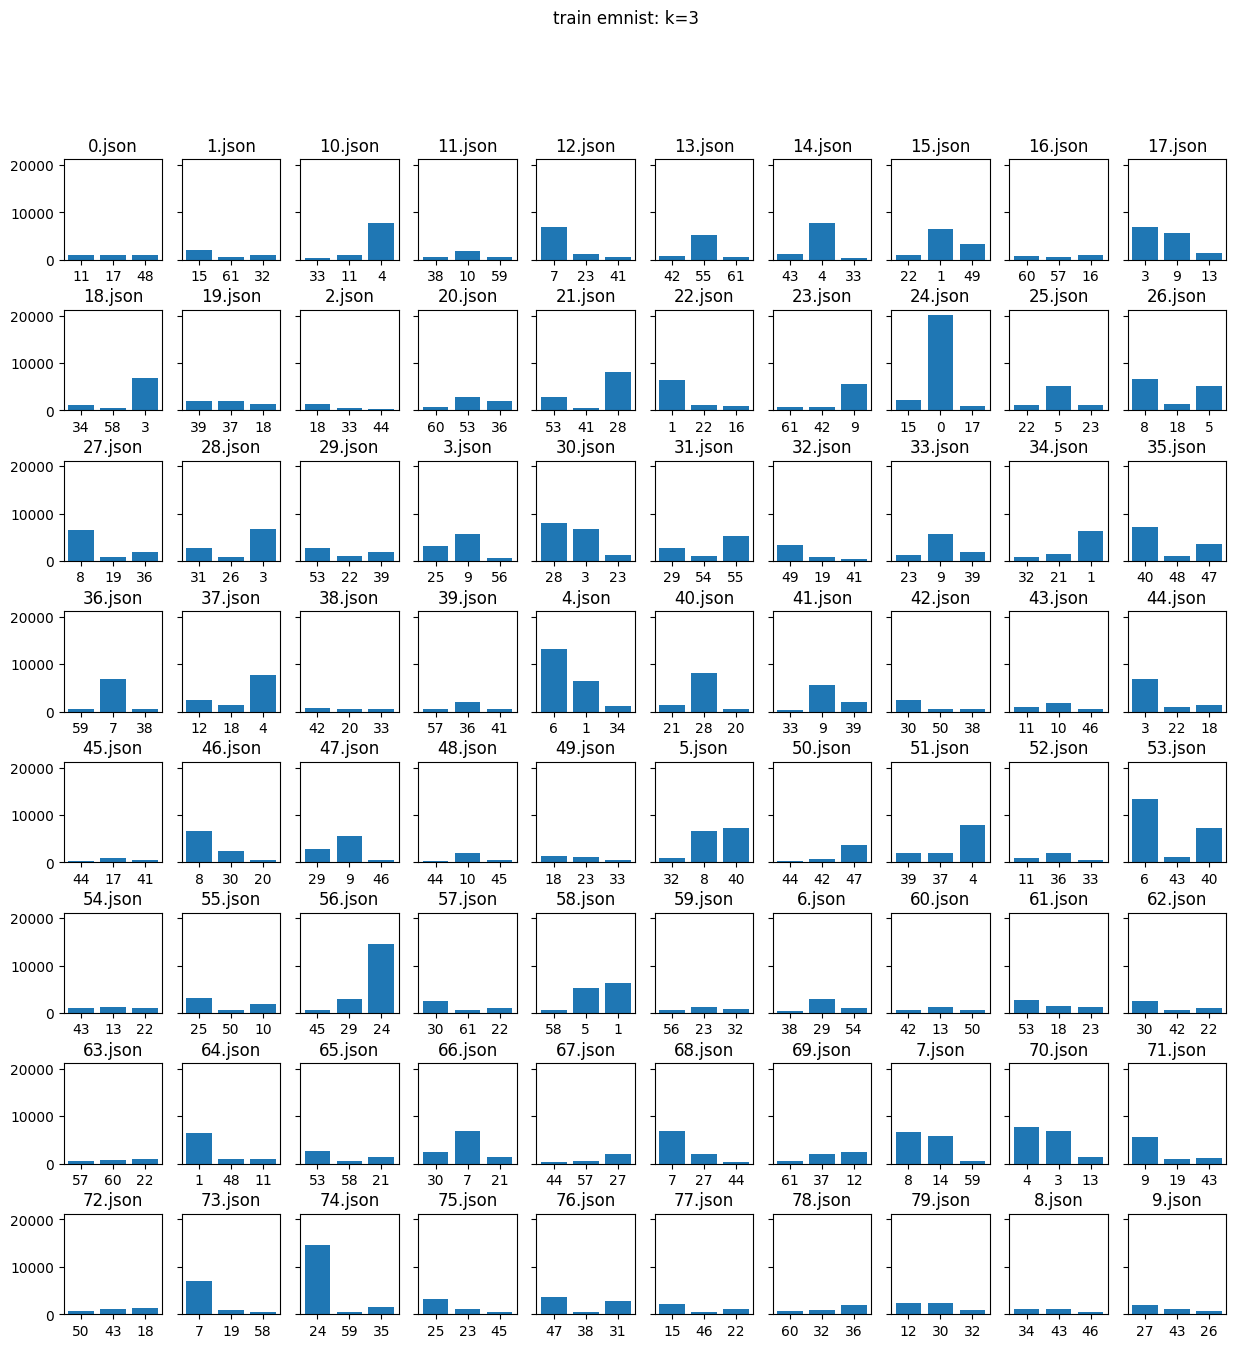

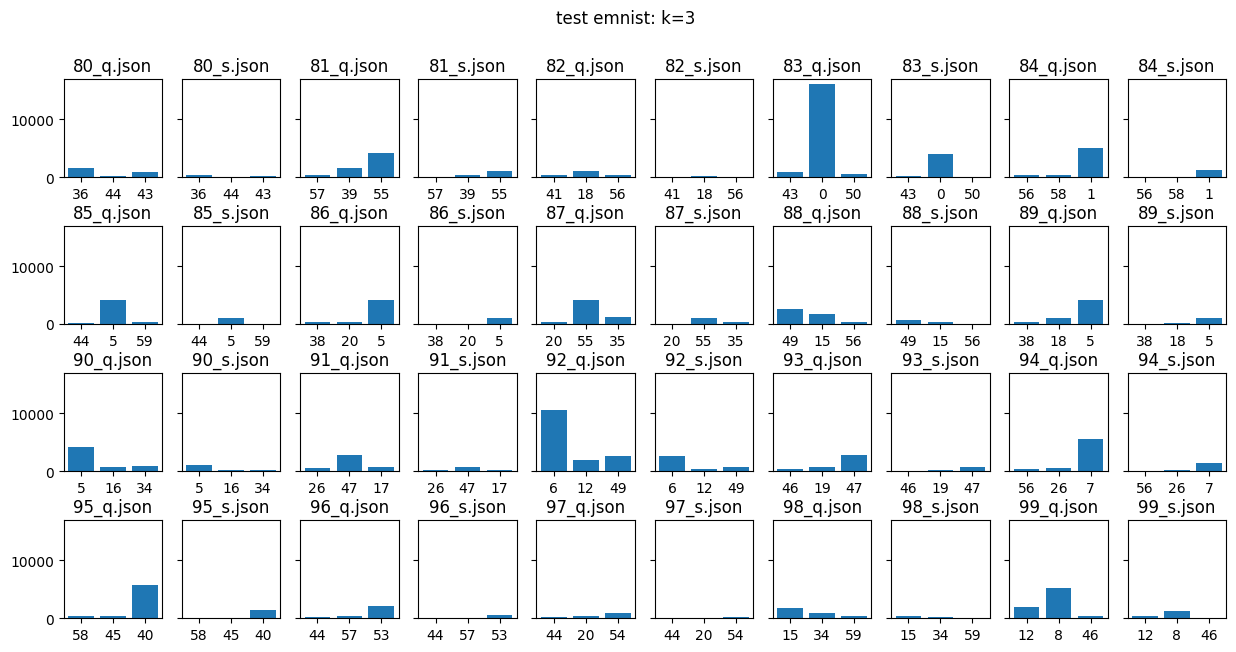

In [5]:
from data_generator import vis_dis_client

# expand output for more
datasets = ['mnist', 'cifar10', 'cifar100', 'emnist']
ks = [1,2,3]
num_labels = [10, 10, 100, 62]

for idx, dataset in enumerate(datasets):
    for k in ks:
        vis_dis_client('../../data/', dataset, k, num_labels[idx])

---

# Generate data (Dirichlet distribution)

- Số mẫu trong 1 label được đem chia cho tất cả client với tỷ lệ rút từ phân phối Dirichlet với $\alpha=0.5$
- Từ đó, mỗi client sẽ có đầy đủ/gần như đầy đủ các mẫu
- Đây là phương pháp mô phỏng khá thật các tình huống non-iid data thực tế

## Split data

In [1]:
from data_generator import dirichlet_based_gen
dirichlet_based_gen()

Get data of mnist

Generate mnist: Dirichlet distribution, num_clients=100, num_labels=10
Write data to ../../data/mnist/client_train_4 and ../../data/mnist/client_test_4

Get data of cifar10

Files already downloaded and verified
Files already downloaded and verified
Generate cifar10: Dirichlet distribution, num_clients=100, num_labels=10
Write data to ../../data/cifar10/client_train_4 and ../../data/cifar10/client_test_4

Get data of cifar100

Files already downloaded and verified
Files already downloaded and verified
Generate cifar100: Dirichlet distribution, num_clients=100, num_labels=100
Write data to ../../data/cifar100/client_train_4 and ../../data/cifar100/client_test_4

Get data of emnist

Generate emnist: Dirichlet distribution, num_clients=100, num_labels=62
Write data to ../../data/emnist/client_train_4 and ../../data/emnist/client_test_4



## Check distribution of clients

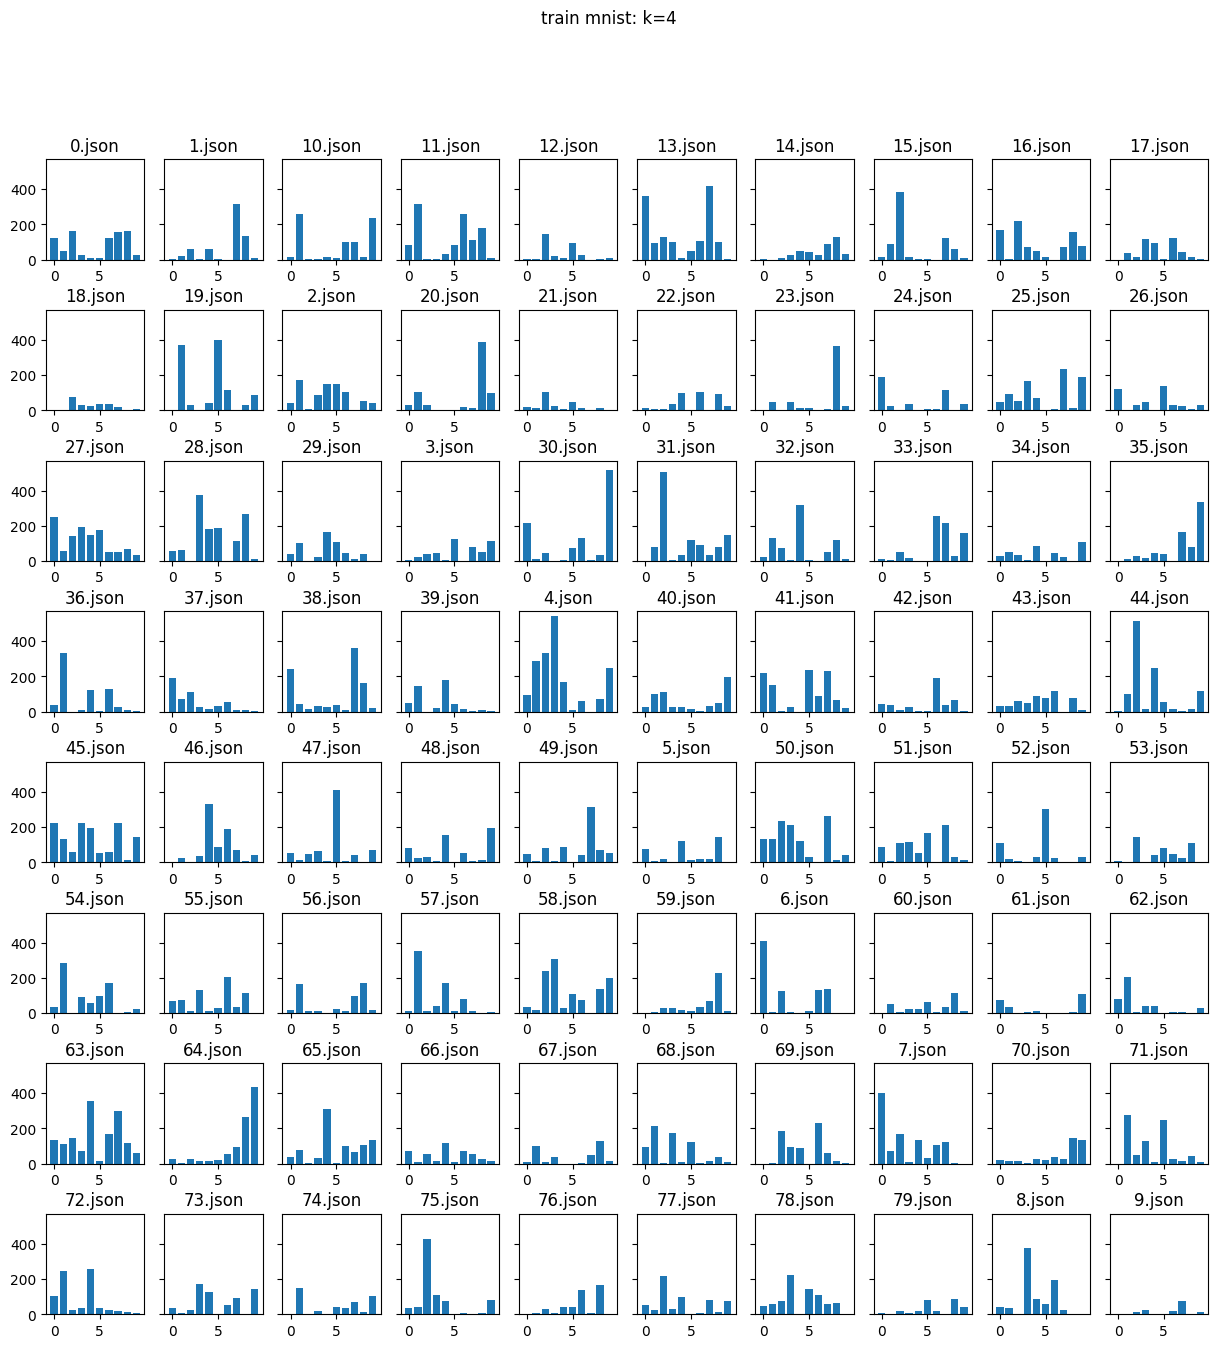

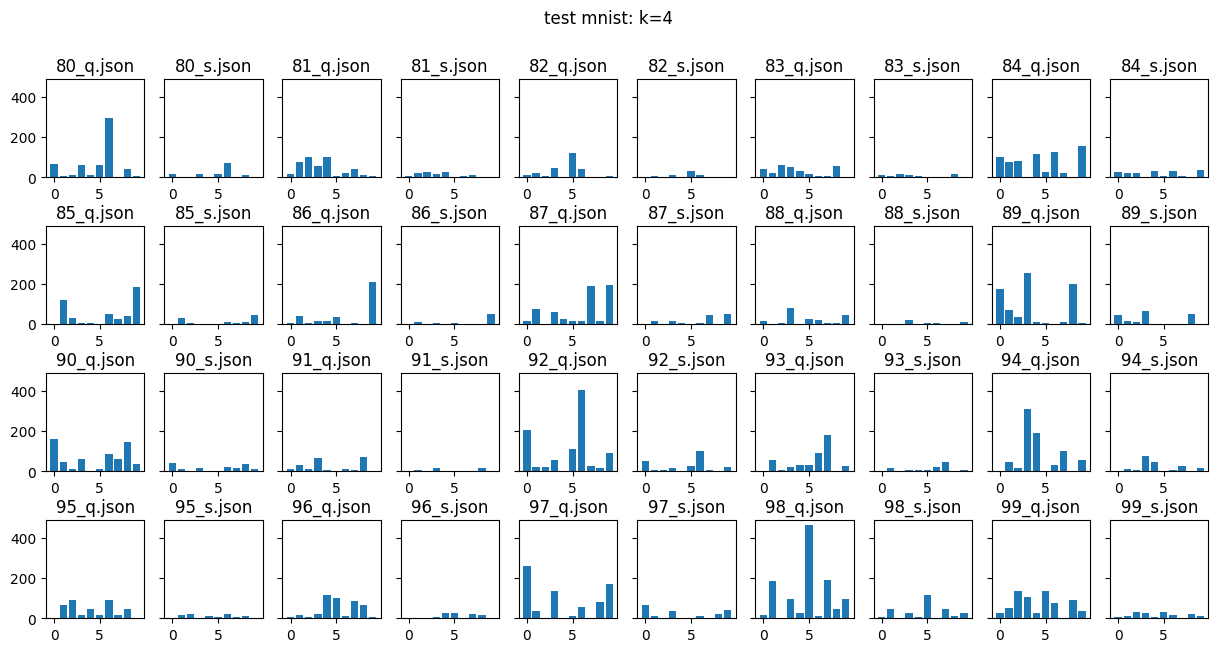

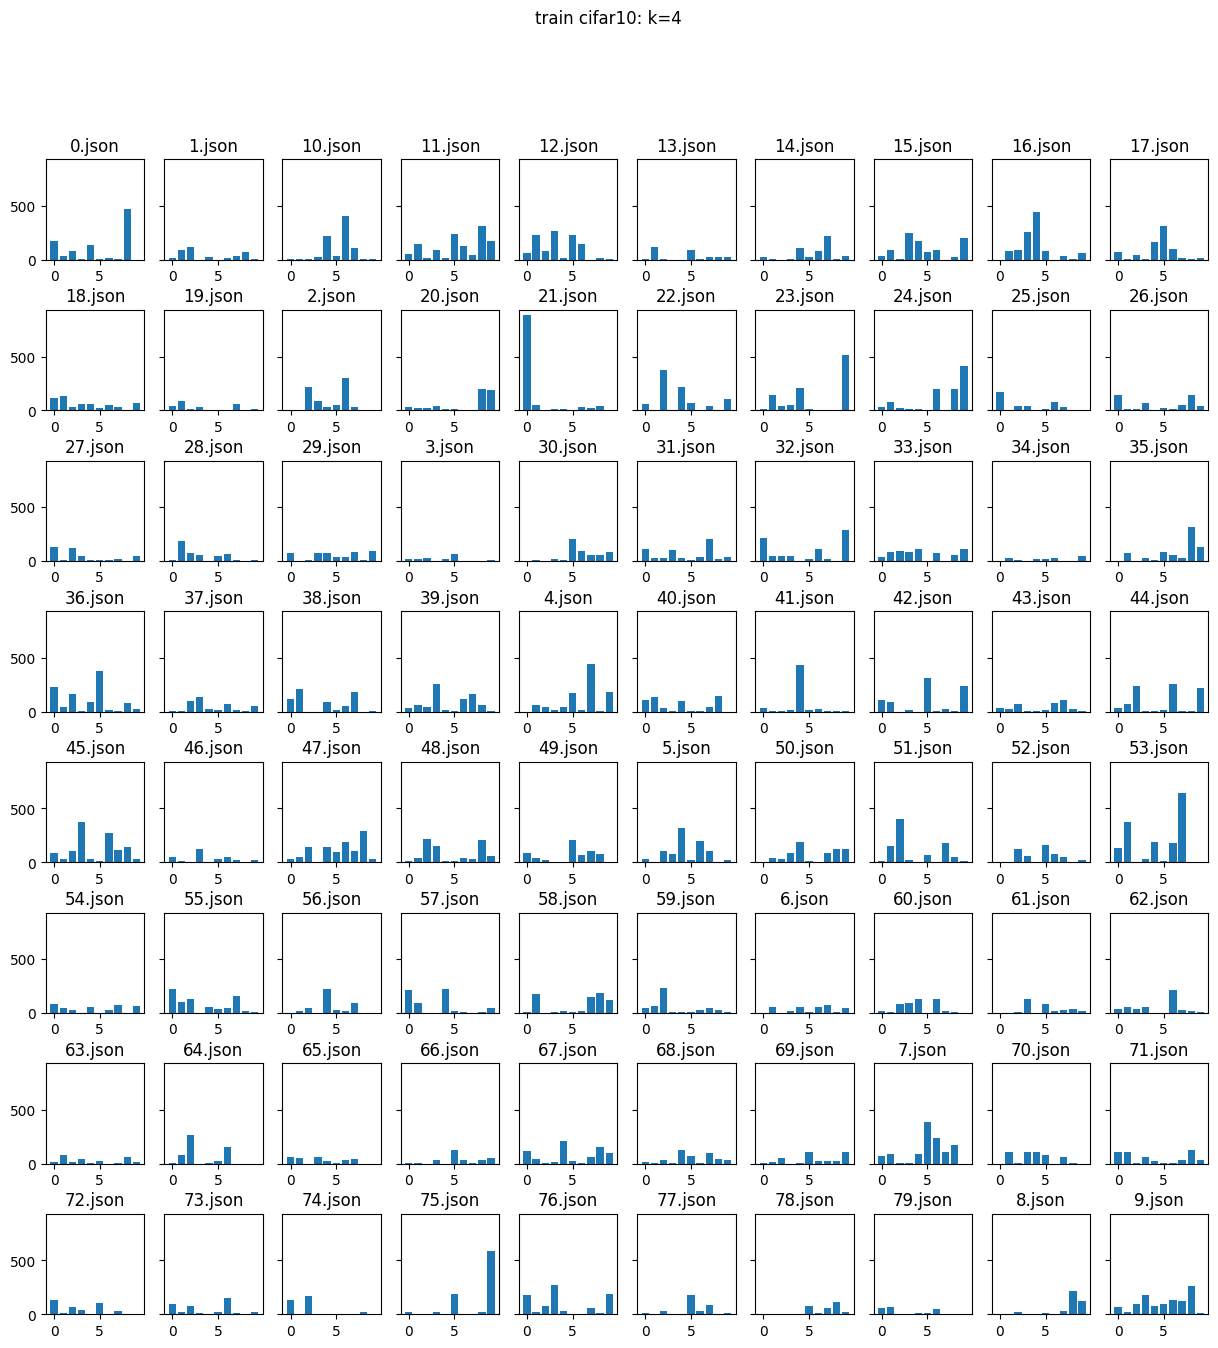

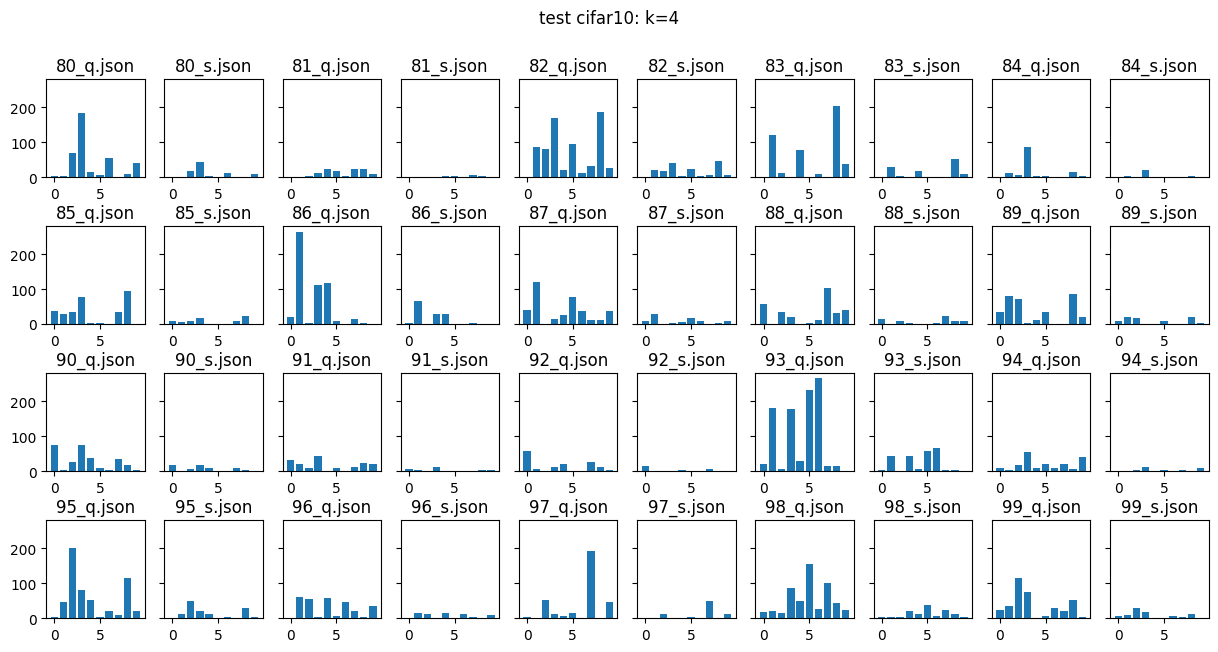

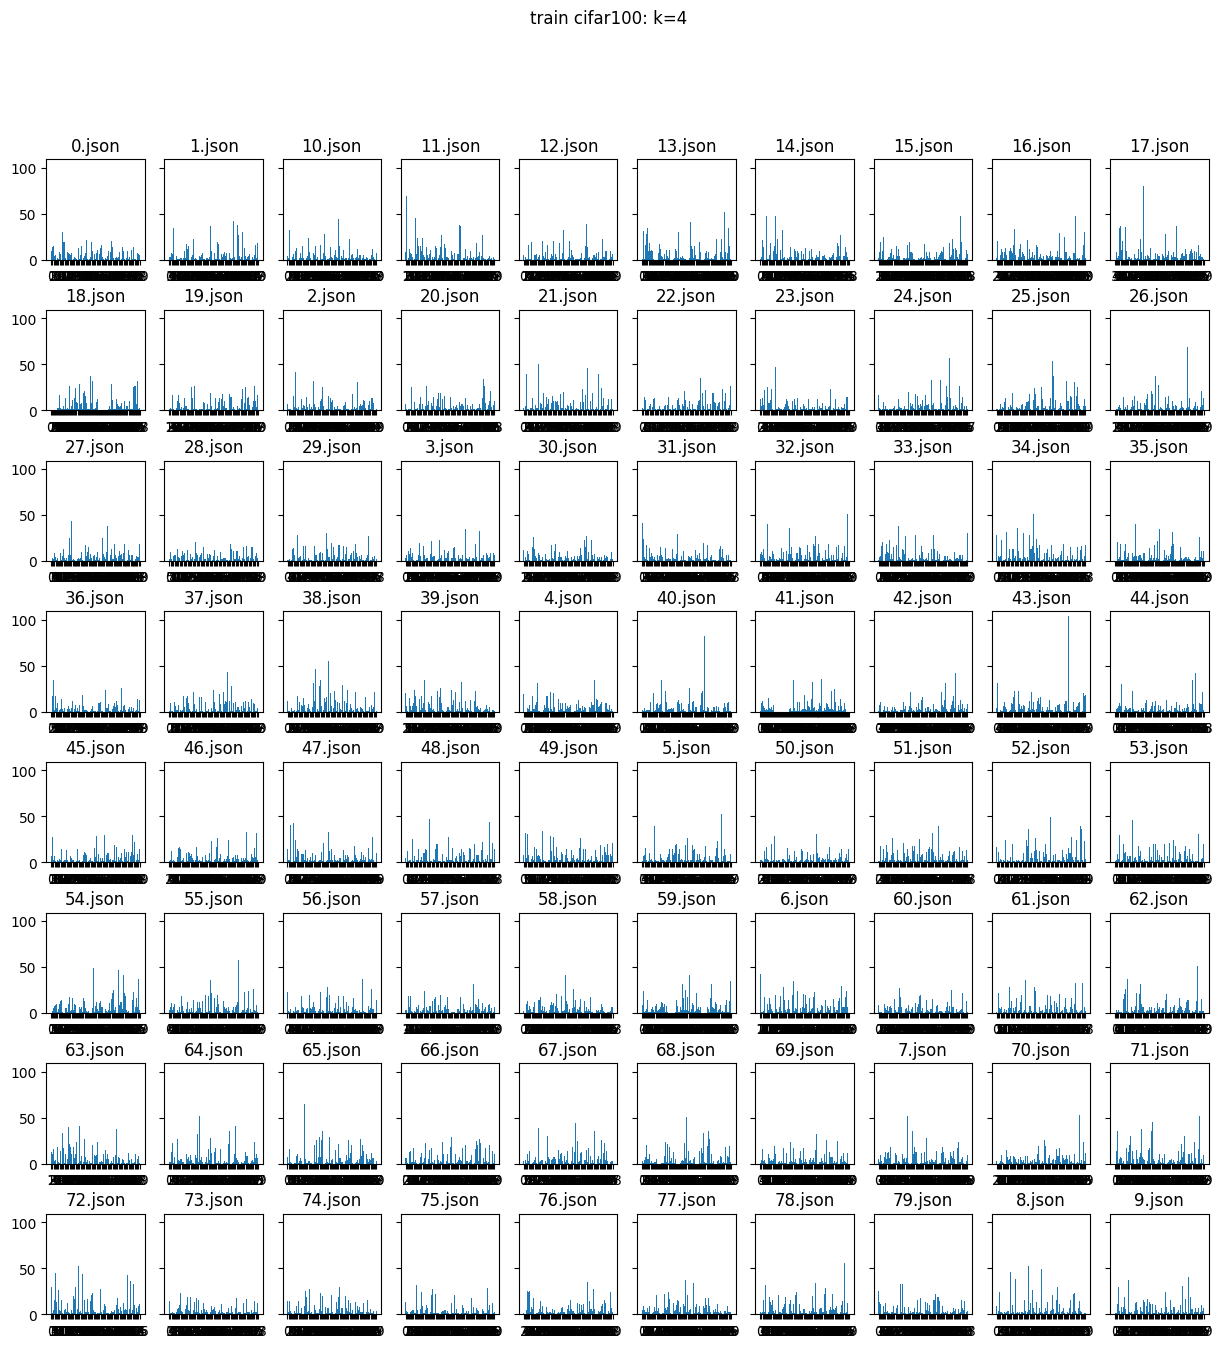

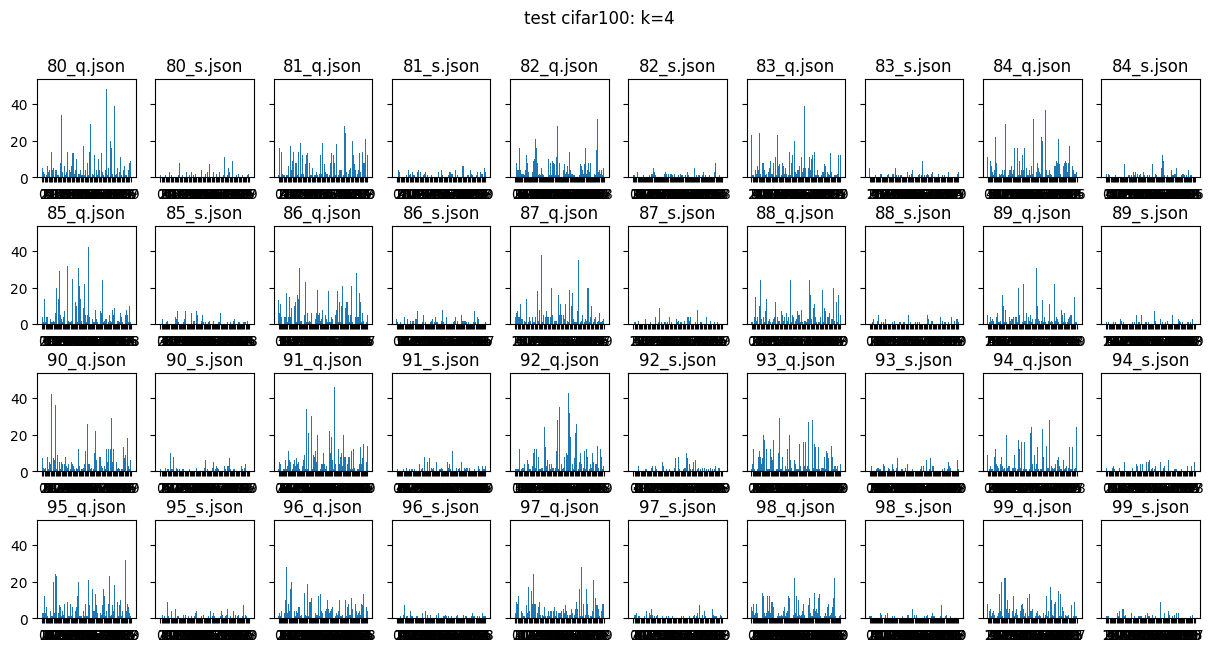

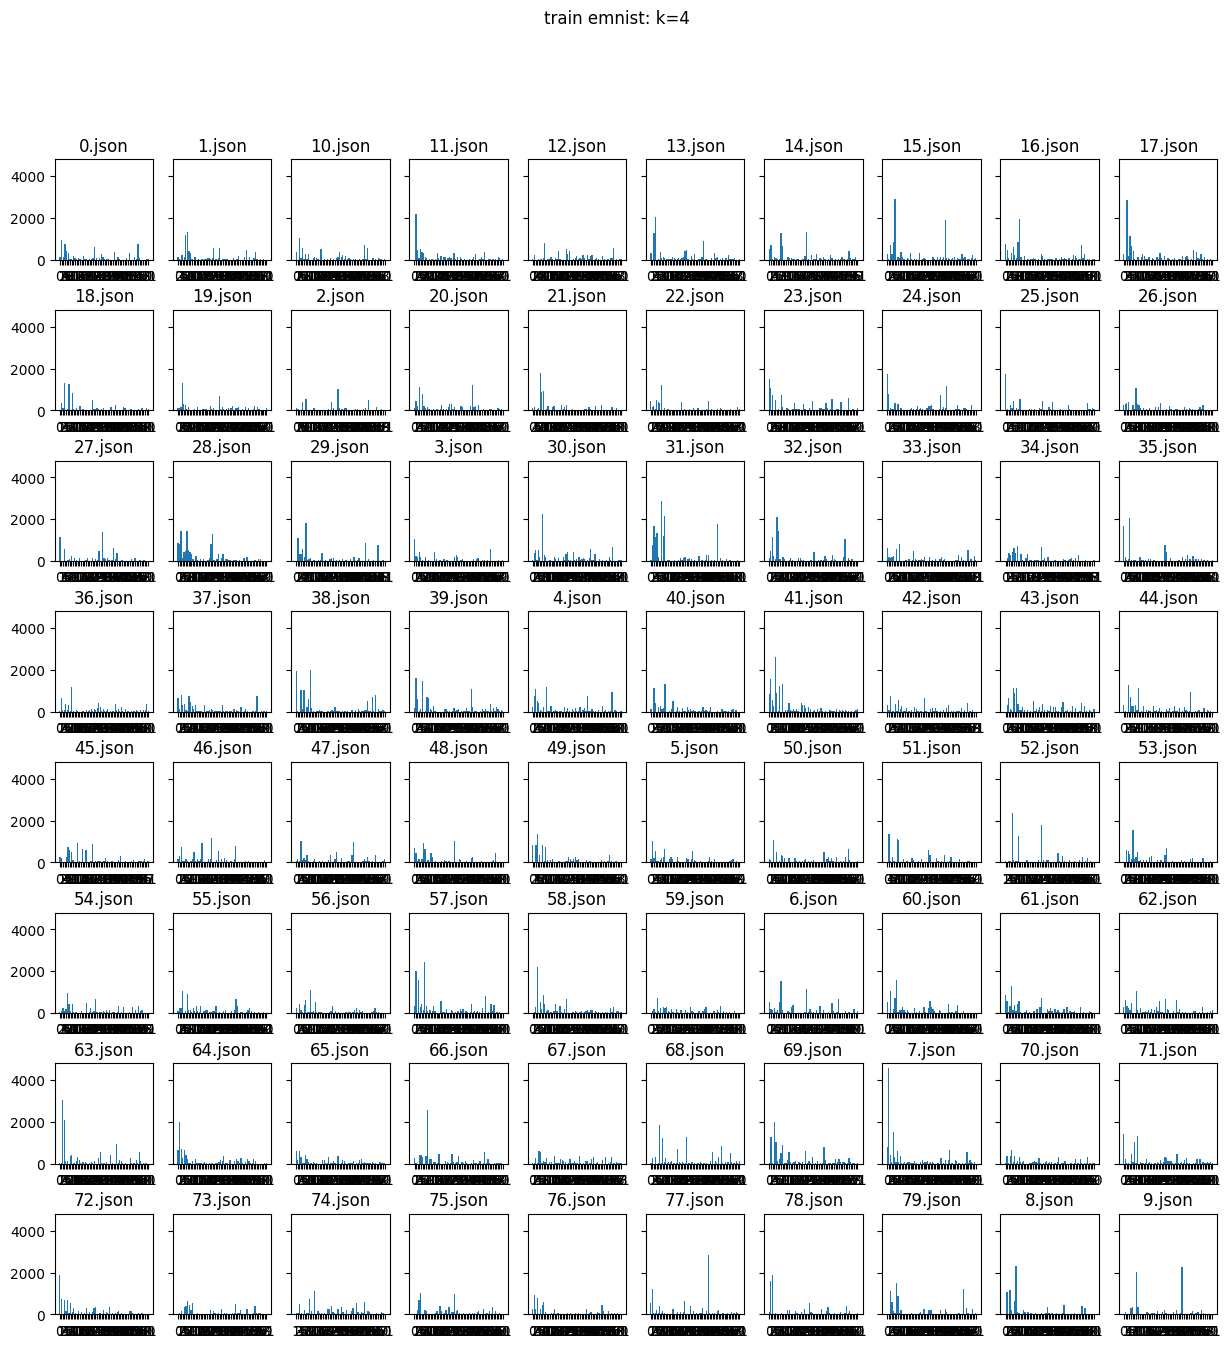

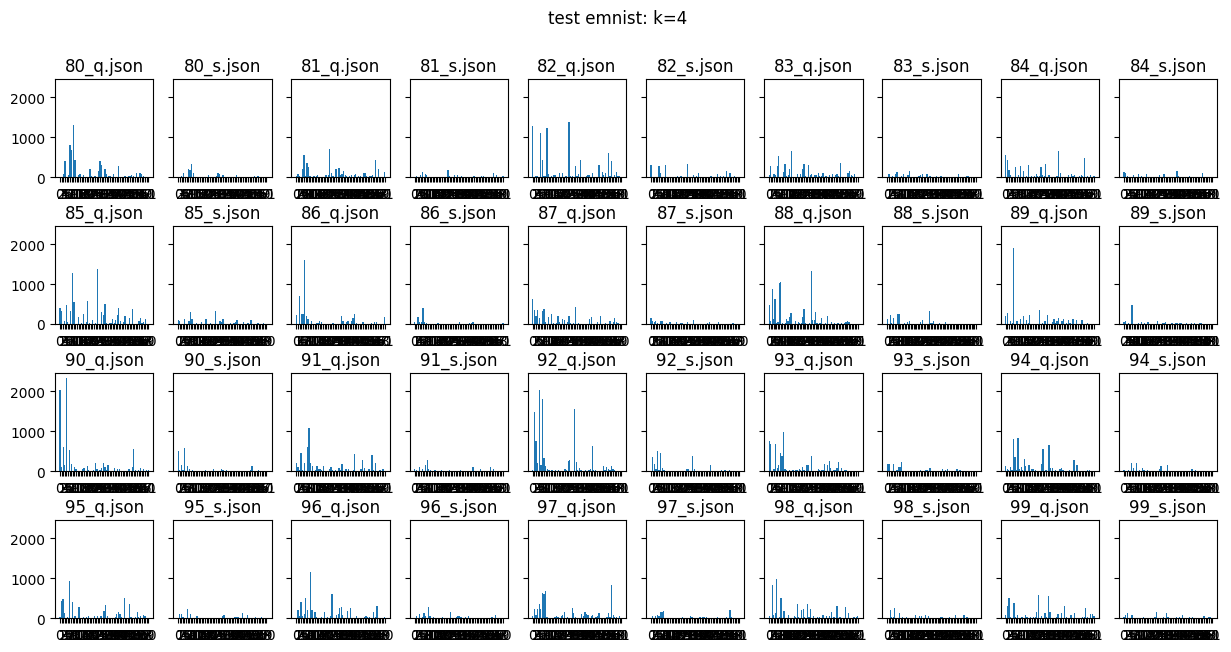

In [6]:
from data_generator import vis_dis_client

# expand output for more
datasets = ['mnist', 'cifar10', 'cifar100', 'emnist']
num_labels = [10, 10, 100, 62]

for idx, dataset in enumerate(datasets):
    vis_dis_client('../../data', dataset, 4, num_labels[idx])

---

# Generate data (iid)

- Với mỗi labels, chia đều số mẫu cho tất cả client
- Thu được data theo phân phối chuẩn (với `EMNIST` thì không còn chuẩn nữa vì sample của các label không đồng nhất).

## Split data

In [2]:
from data_generator import iid_gen
iid_gen()

Get data of mnist

Generate mnist: IID, num_clients=100, num_labels=10
Write data to ../../data/mnist/client_train_5 and ../../data/mnist/client_test_5

Get data of cifar10

Files already downloaded and verified
Files already downloaded and verified
Generate cifar10: IID, num_clients=100, num_labels=10
Write data to ../../data/cifar10/client_train_5 and ../../data/cifar10/client_test_5

Get data of cifar100

Files already downloaded and verified
Files already downloaded and verified
Generate cifar100: IID, num_clients=100, num_labels=100
Write data to ../../data/cifar100/client_train_5 and ../../data/cifar100/client_test_5

Get data of emnist

Generate emnist: IID, num_clients=100, num_labels=62
Write data to ../../data/emnist/client_train_5 and ../../data/emnist/client_test_5



## Check distribution

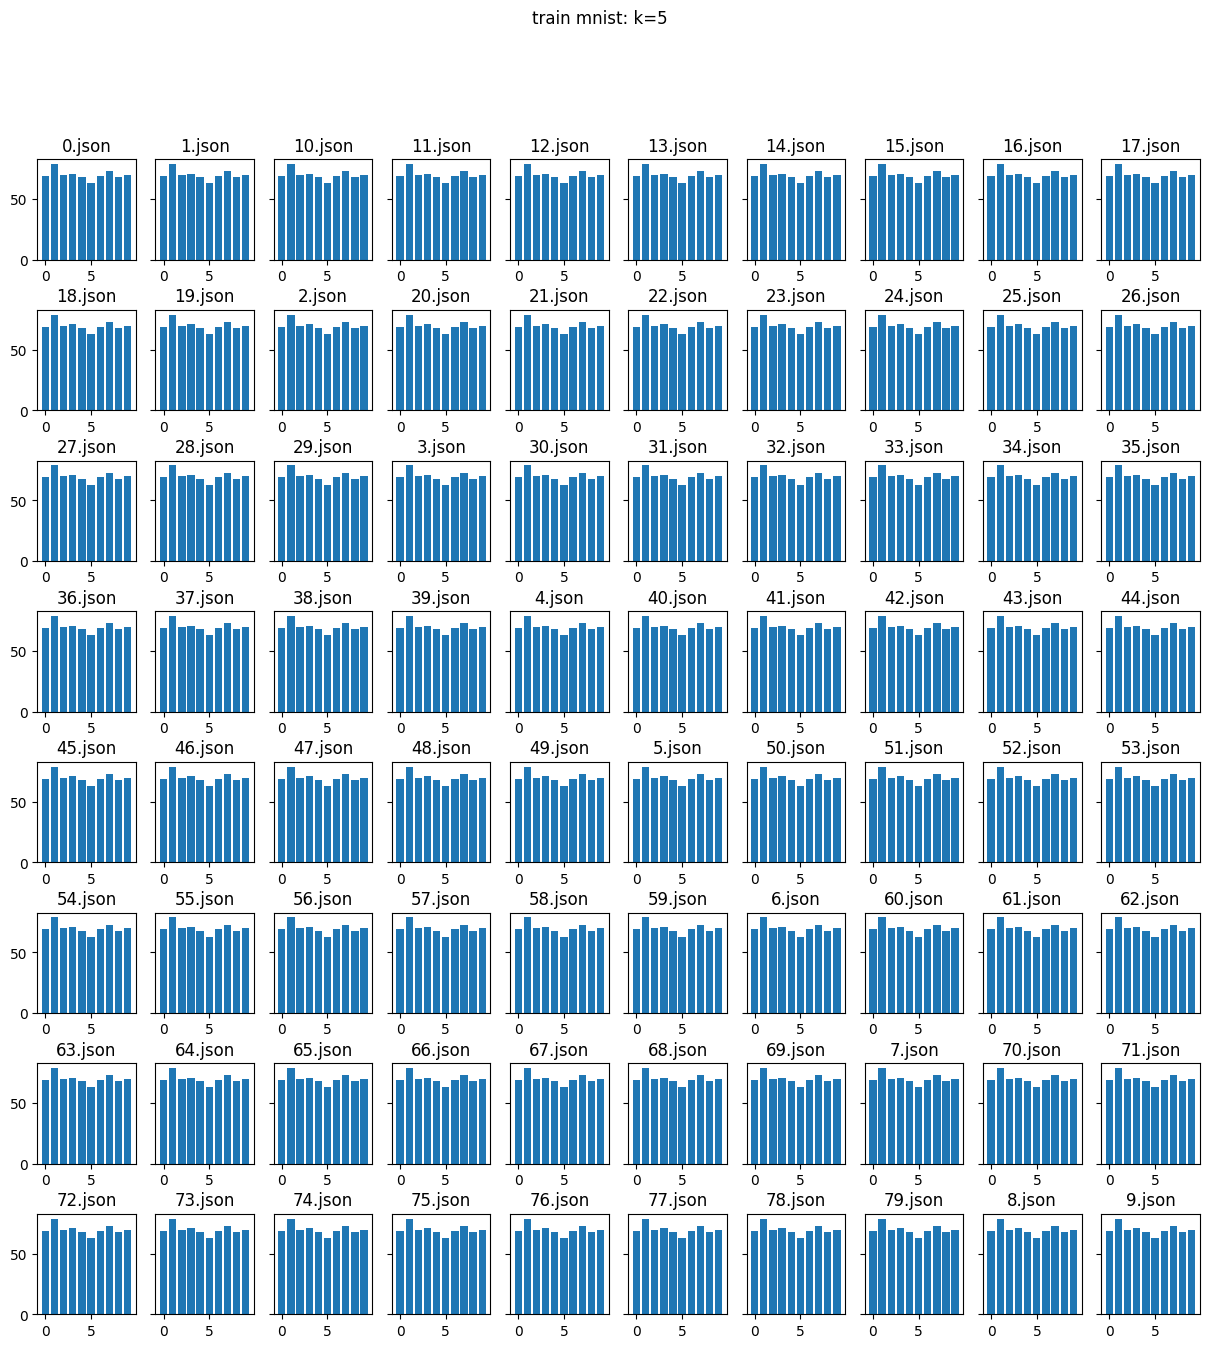

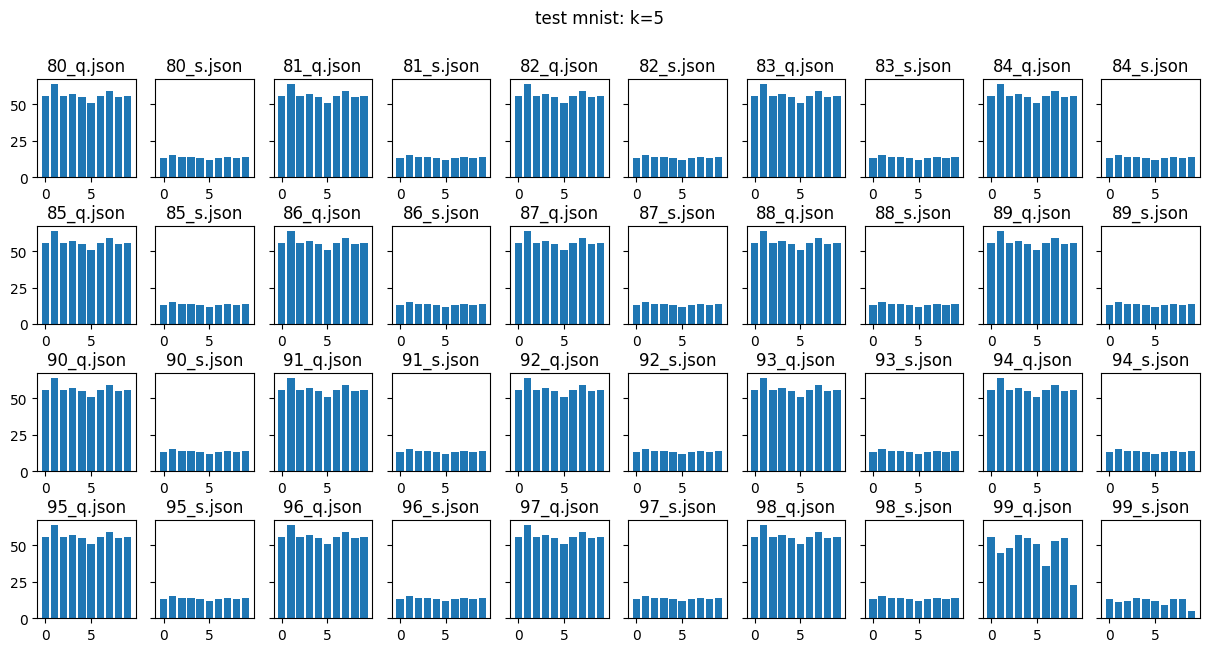

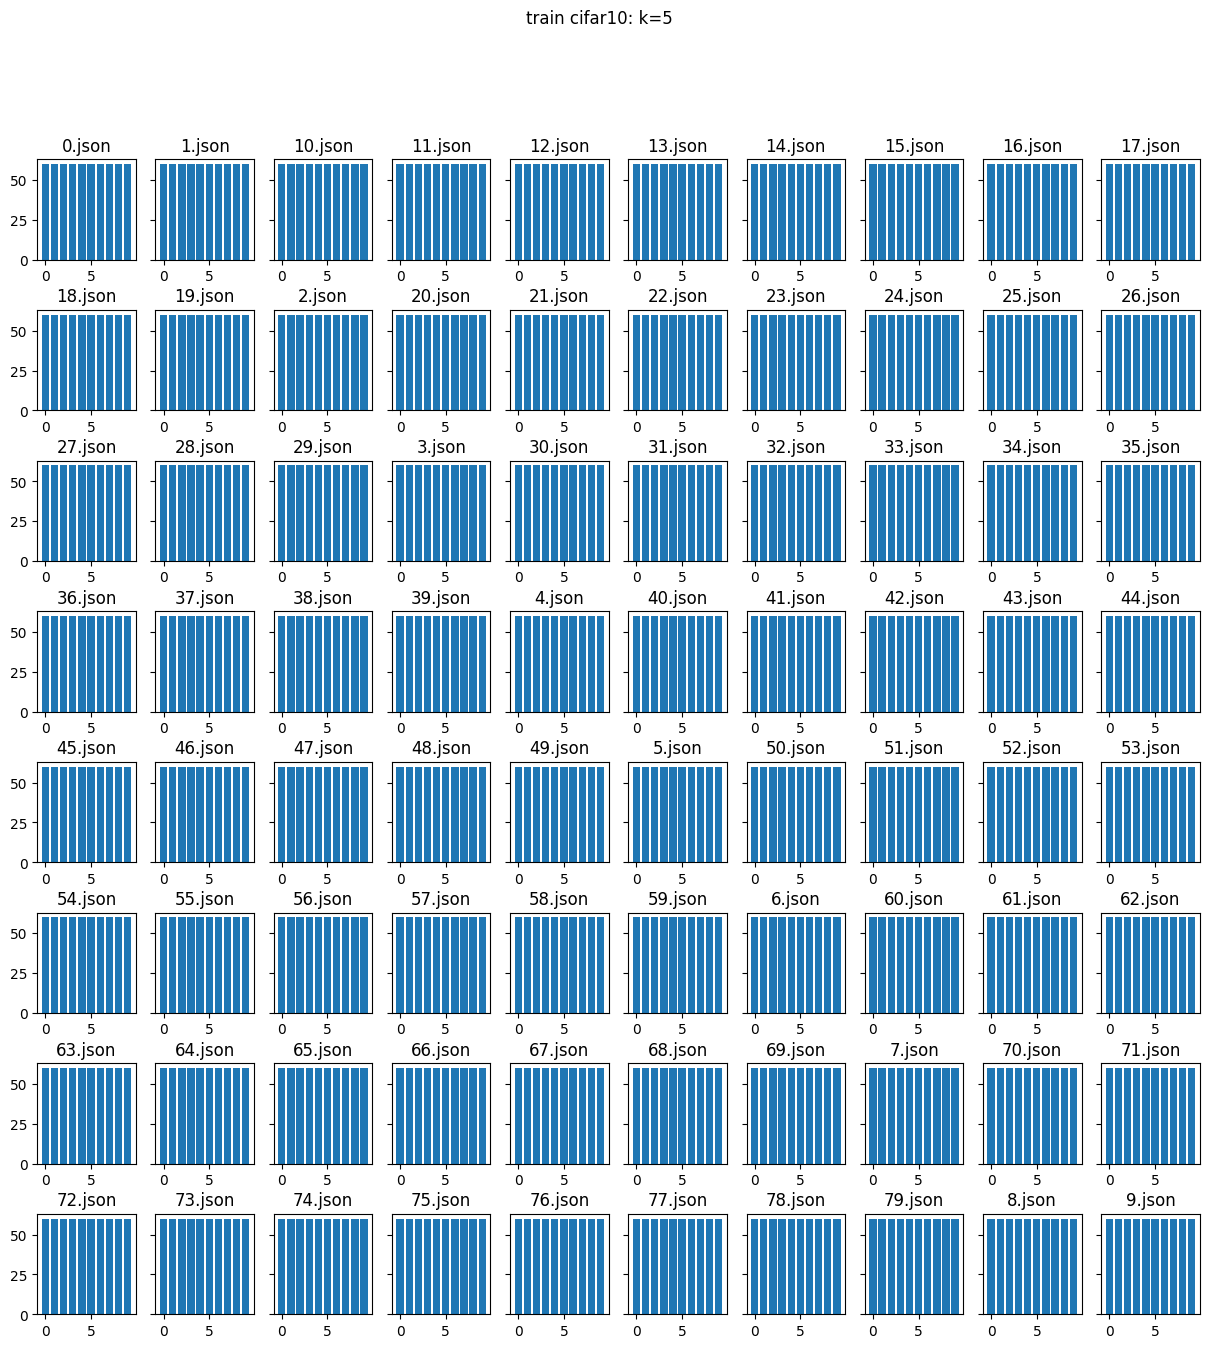

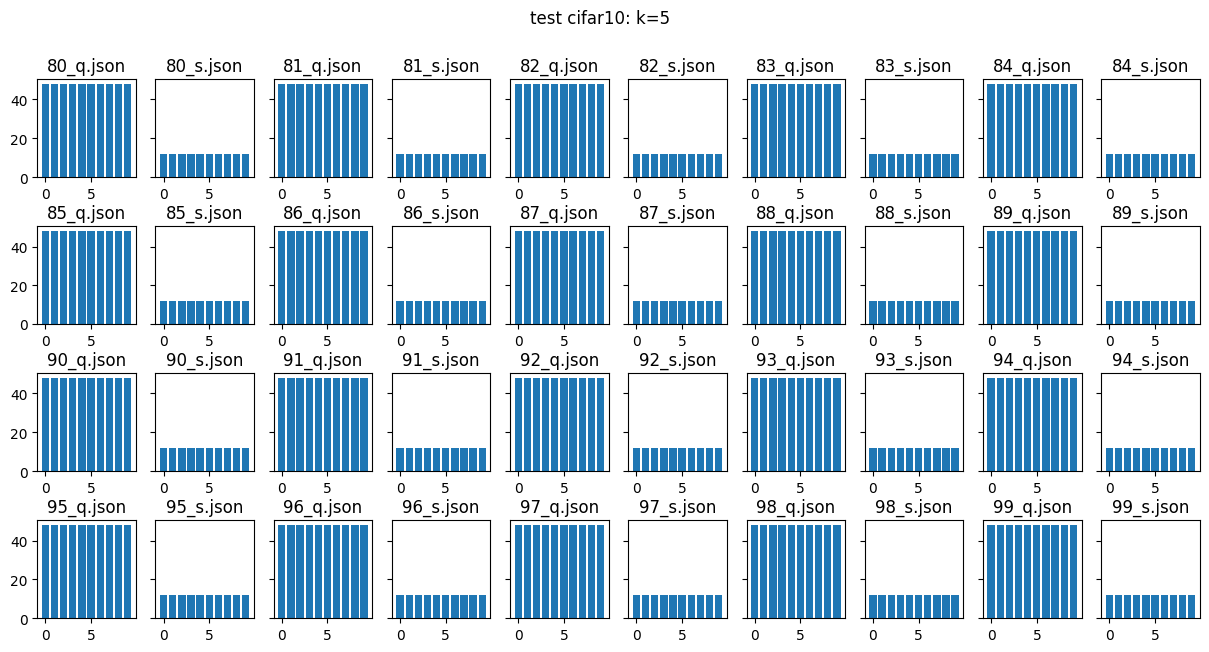

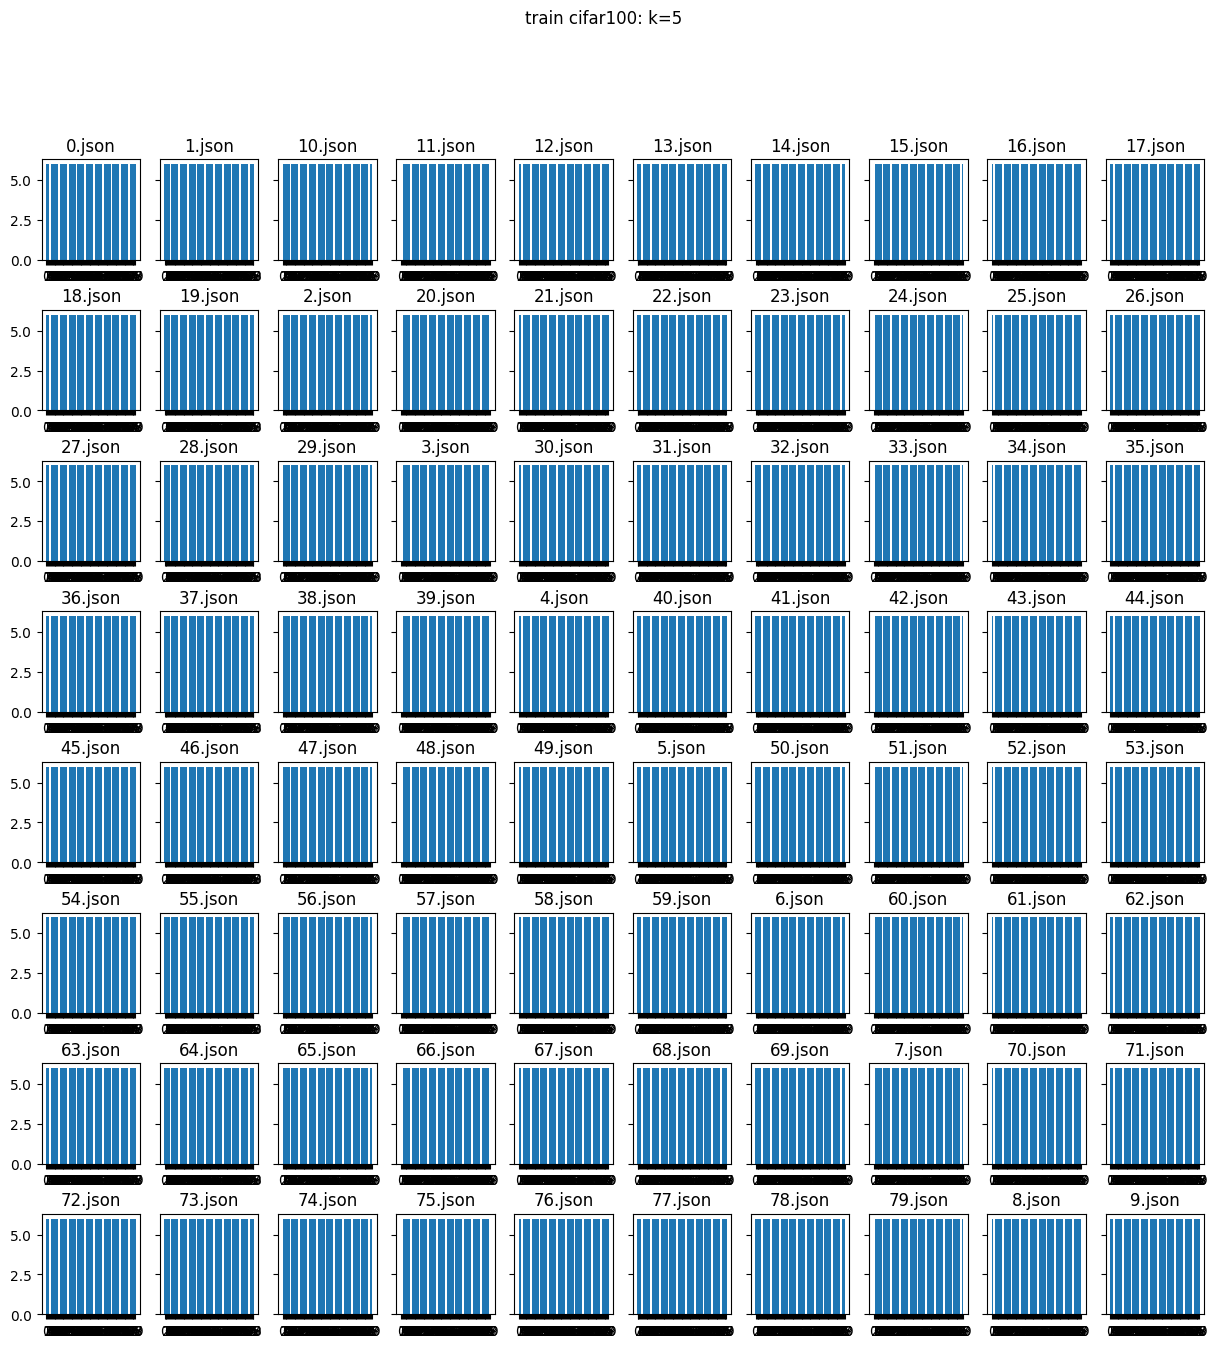

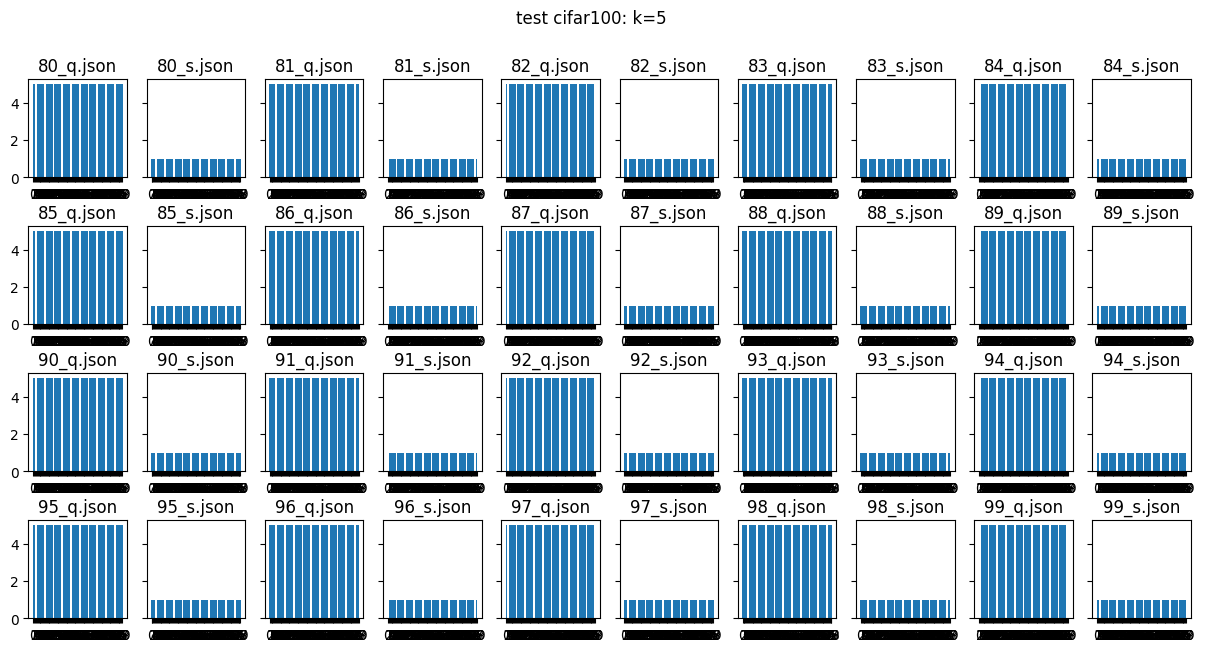

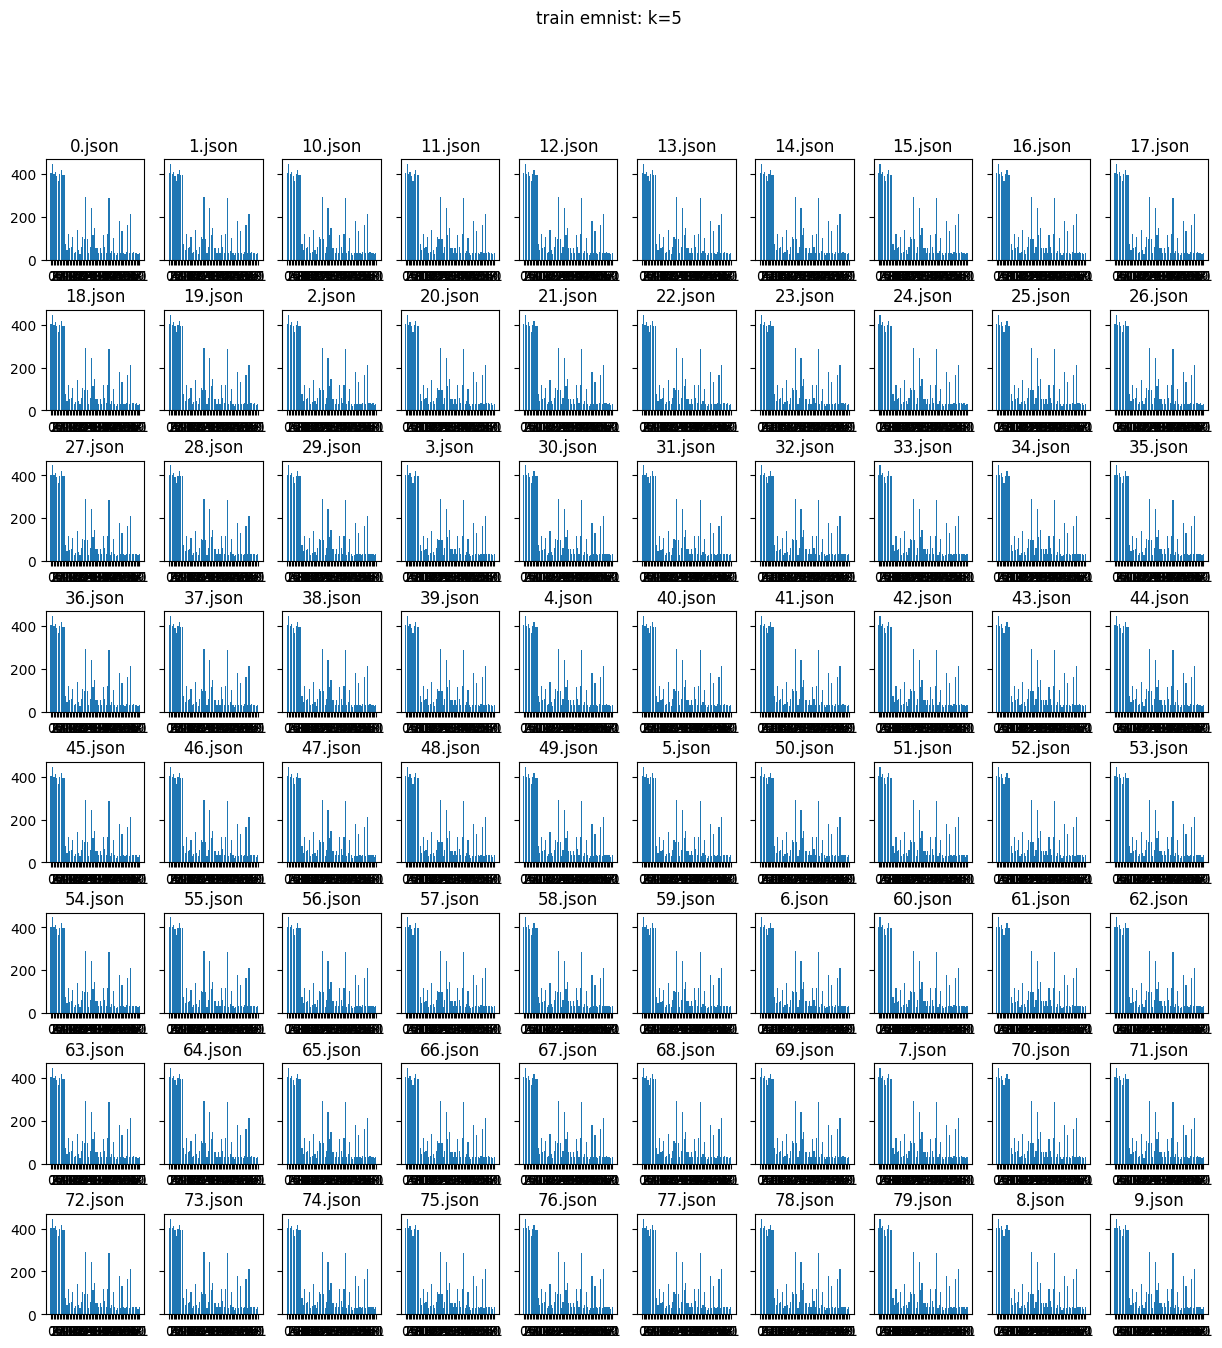

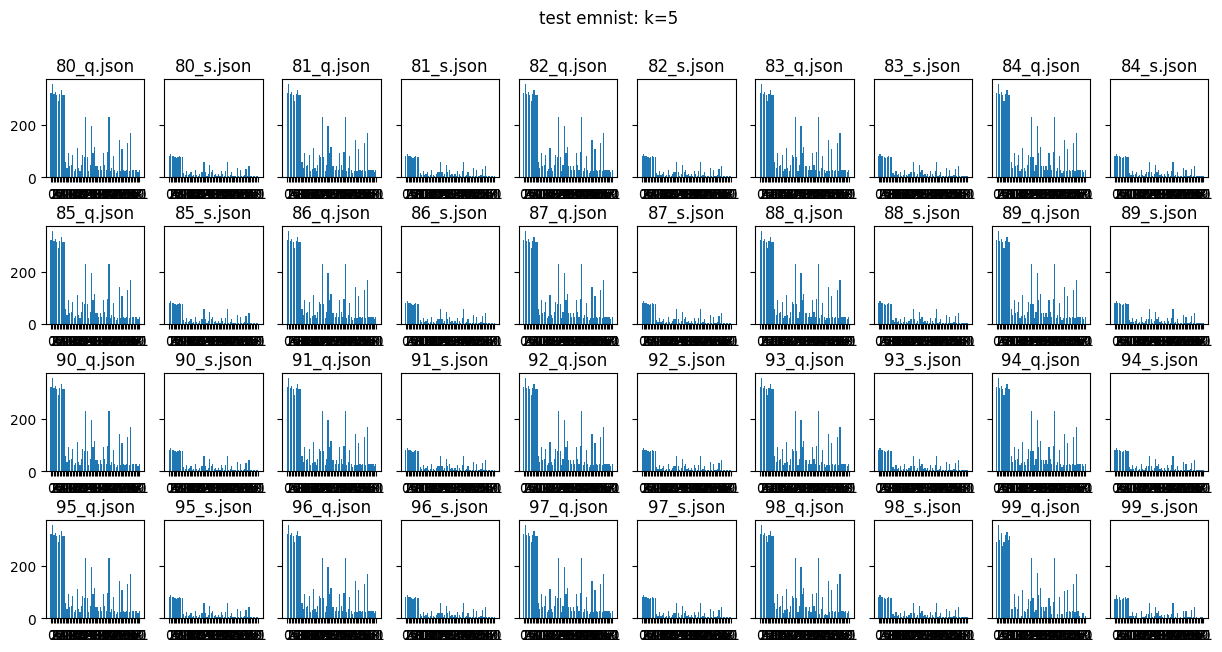

In [7]:
from data_generator import vis_dis_client

# expand output for more
datasets = ['mnist', 'cifar10', 'cifar100', 'emnist']
num_labels = [10, 10, 100, 62]

for idx, dataset in enumerate(datasets):
    vis_dis_client('../../data/', dataset, 5, num_labels[idx])

---

# Generate data (add noise to iid $\to$ feature skew)

- Divide sample of each label to all clients equally
- Add different levels of Gaussian noise to each client
- We utilize the available iid data. For each client, we load them with a pre-defined noise level.
- Add Gaussian noise to data with the following param: $\mu=0, \sigma=c\times \frac{i}{N} \text{, với: } (c=const, i=cid, N=num\_clients)$

## Example

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


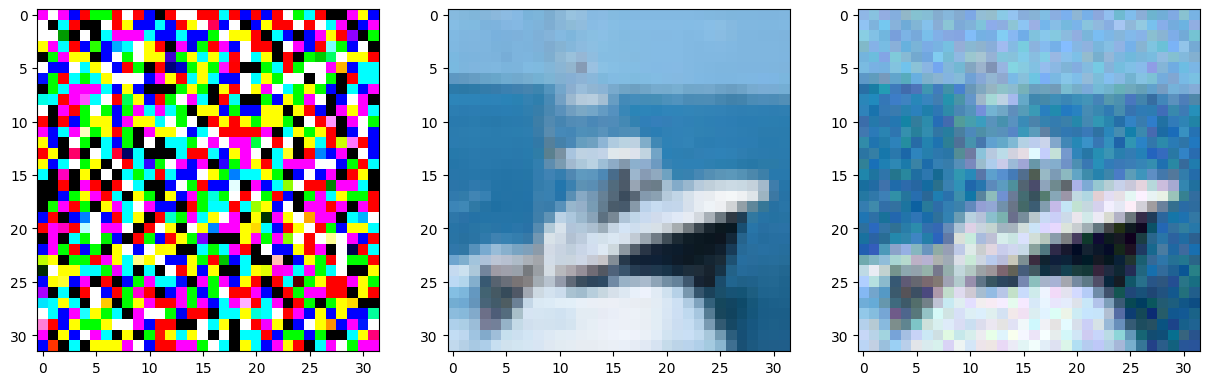

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision

dataset = torchvision.datasets.CIFAR10(root='../../data/cifar10/', train=True, download=True, transform=transforms.ToTensor())

# create noise
noise = np.random.normal(0, 10, (32,32,3))

# get a data point
img = dataset.data[8]

# add noise to data point and normalized to [0,1]
new_img = img + noise
new_img[new_img>255] = 255
new_img/=255.

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].imshow(noise)
ax[1].imshow(img)
ax[2].imshow(new_img)

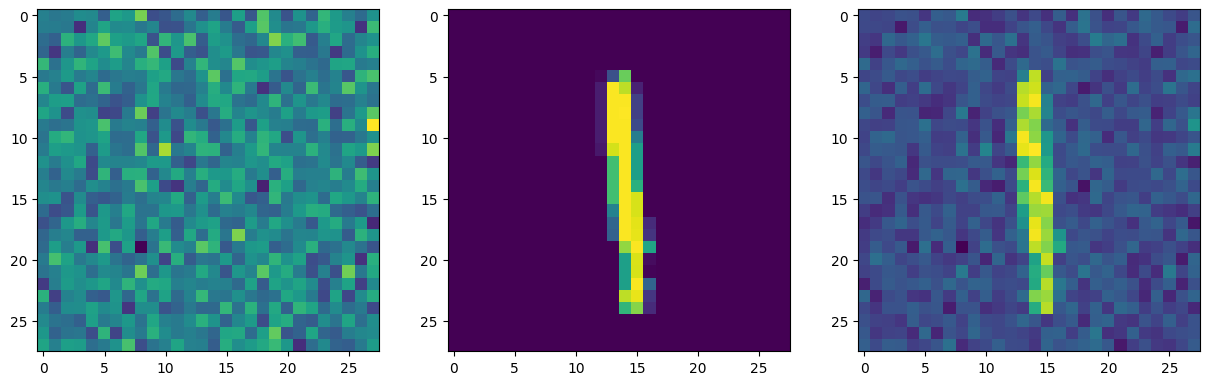

In [9]:
dataset = torchvision.datasets.MNIST(root='../../data/mnist/', train=True, download=True, transform=transforms.ToTensor())

# create noise
noise = np.random.normal(0, 0.1, (28,28))

# get a data point
img = dataset.data[8]/255.

# add noise to data point and normalized to [0,1]
new_img = img + noise

# # normalized
# new_img[new_img>255] = 255
# new_img/=255.

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].imshow(noise)
ax[1].imshow(img)
ax[2].imshow(new_img)